# IS 675 Project - Vehicle Insurance Claim Fraud Detection

## 1.0 Introduction

This dataset contains information of vehicle claims from policy holders.

We will use this file to predict whether or not fraud exists in a claim.

Our goal is to identify which variables does the insurance company need to consider in order to identify potential Fraud.


* Month: The month when the incident occurred. Example values include (e.g., Dec, Jan).
* WeekOfMonth: The week of the month when the incident occurred. Example values include (e.g., 5, 3).
* DayOfWeek: The day of the week when the incident occurred. Example values include (e.g., Wednesday, Friday).
* Make: The brand or manufacturer of the vehicle involved. Example values include (e.g., Honda, Toyota).
* AccidentArea: The type of area where the accident occurred (Urban or Rural). Example values include (e.g., Urban, Rural).
* DayOfWeekClaimed: The day of the week when the claim was filed. Example values include (e.g., Tuesday, Monday).
* MonthClaimed: The month when the claim was filed. Example values include (e.g., Jan, Nov).
* WeekOfMonthClaimed: The week of the month when the claim was filed. Example values include (e.g., 1, 4).
* Sex: The gender of the policyholder. Example values include (e.g., Female, Male).
* MaritalStatus: The marital status of the policyholder. Example values include (e.g., Single, Married).
* Age: The age of the policyholder. Example values include (e.g., 21, 34).
* Fault: Indicates who was at fault in the incident (Policy Holder or Third Party). Example values include (e.g., Policy Holder, Third Party).
* PolicyType: The type of policy the policyholder has. Example values include (e.g., Sport - Liability, Sport - Collision).
* VehicleCategory: The category or type of the vehicle involved (e.g., Sport, Utility). Example values include (e.g., Sport, Utility).
* VehiclePrice: The price range of the vehicle. Example values include (e.g., more than 69000, 20000 to 29000).
* FraudFound_P: Indicates whether fraud was found in the claim (0 for No, 1 for Yes). Example values include (e.g., 0, 1).
* PolicyNumber: A unique identifier for the policy. Example values include (e.g., 1, 2).
* RepNumber: The number assigned to the insurance representative handling the case. Example values include (e.g., 12, 15).
* Deductible: The deductible amount the policyholder is required to pay. Example values include (e.g., 300, 400).
* DriverRating: A rating assigned to the driver based on their risk level. Example values include (e.g., 1, 4).
* Days_Policy_Accident: The number of days between the policy start and the accident. Example values include (e.g., more than 30, 15 to 30).
* Days_Policy_Claim: The number of days between the policy start and the claim filing. Example values include (e.g., more than 30, 15 to 30).
* PastNumberOfClaims: The number of claims filed by the policyholder in the past. Example values include (e.g., none, 1).
* AgeOfVehicle: The age of the vehicle involved in the incident. Example values include (e.g., 3 years, 6 years).
* AgeOfPolicyHolder: The age range of the policyholder. Example values include (e.g., 26 to 30, 31 to 35).
* PoliceReportFiled: Indicates whether a police report was filed (Yes or No). Example values include (e.g., No, Yes).
* WitnessPresent: Indicates whether a witness was present at the incident (Yes or No). Example values include (e.g., No, Yes).
* AgentType: The type of agent handling the case (Internal or External). Example values include (e.g., External, Internal).
* NumberOfSuppliments: The number of supplements filed with the claim. Example values include (e.g., none, more than 5).
* AddressChange_Claim: The time since the policyholder's address was last changed. Example values include (e.g., 1 year, no change).
* NumberOfCars: The number of vehicles involved in the incident. Example values include (e.g., 3 to 4, 1 vehicle).
* Year: The year when the incident occurred. Example values include (e.g., 1994, 1995).
* BasePolicy: The type of base policy (e.g., Liability, Collision). Example values include (e.g., Liability, Collision).

### 1.1 Initialization

Import all libraries used

In [ ]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import torch
import torch.nn as nn

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from torch.utils.data import DataLoader, TensorDataset
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

Mount google drive

In [ ]:
# Mounting Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read csv file and establish dataframe

In [ ]:
df = pd.read_csv('/content/drive/My Drive/IS675_Project/fraud_oracle.csv')

### 1.2 Feature Understanding

#### 1.21 Feature Dimensions

In [ ]:
# Shape of the DataFrame (rows and columns)
print("Shape of the DataFrame:", df.shape)

# Column names
print("Column names:", df.columns.tolist())

# Data types of each column
print("Data types:")
print(df.dtypes)

Shape of the DataFrame: (15420, 33)
Column names: ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy']
Data types:
Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCate

In [ ]:
# Summary statistics for numerical columns
print("Numerical summary:")
print(df.describe())

# Summary statistics for categorical columns
print("Categorical summary:")
print(df.describe(include=['object', 'category']))

Numerical summary:
        WeekOfMonth  WeekOfMonthClaimed           Age  FraudFound_P  \
count  15420.000000        15420.000000  15420.000000  15420.000000   
mean       2.788586            2.693969     39.855707      0.059857   
std        1.287585            1.259115     13.492377      0.237230   
min        1.000000            1.000000      0.000000      0.000000   
25%        2.000000            2.000000     31.000000      0.000000   
50%        3.000000            3.000000     38.000000      0.000000   
75%        4.000000            4.000000     48.000000      0.000000   
max        5.000000            5.000000     80.000000      1.000000   

       PolicyNumber     RepNumber    Deductible  DriverRating          Year  
count  15420.000000  15420.000000  15420.000000  15420.000000  15420.000000  
mean    7710.500000      8.483268    407.704280      2.487808   1994.866472  
std     4451.514911      4.599948     43.950998      1.119453      0.803313  
min        1.000000      1.00

In [ ]:
# Count of missing values per column
print("Missing values per column:")
print(df.isnull().sum())

# Percentage of missing values (optional)
print("Percentage of missing values:")
print(df.isnull().mean() * 100)

Missing values per column:
Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64
Percentage of missing values:
Month                   0.0
WeekOfMonth             0.0
DayOfWeek       

#### 1.22 Target Variable

In [ ]:
y = df['FraudFound_P']

FraudFound_P
*   0 means no fraud is found
*   1 means fraud is found



In [ ]:
y.unique()

array([0, 1])

In [ ]:
y.value_counts()

,count
FraudFound_P,
0,14497
1,923


FraudFound_P
0    14497
1      923
Name: count, dtype: int64


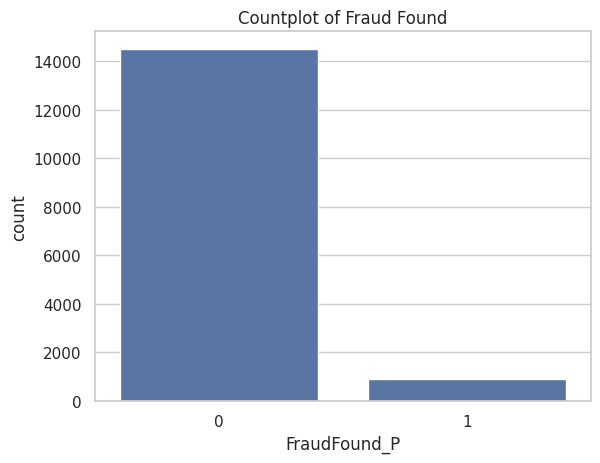

In [ ]:
# Assuming 'df' is your original DataFrame
snsplot = sns.countplot(x='FraudFound_P', data=df)  # Change 'y' to 'df'
snsplot.set_title("Countplot of Fraud Found")

# Get the count of each unique value in the 'FraudFound_P' column
Fraud_Found_Summary = df['FraudFound_P'].value_counts()  # Change 'y' to 'df'

# Display the summary
print(Fraud_Found_Summary)

### 1.3 Protected Features

In [ ]:
df_protected_features = df[['Sex', 'MaritalStatus', 'Age']]

In [ ]:
df_protected_features.head()

,Sex,MaritalStatus,Age
0,Female,Single,21
1,Male,Single,34
2,Male,Married,47
3,Male,Married,65
4,Female,Single,27


Seperate Protected Features from main dataframe

In [ ]:
df.drop(['Sex', 'MaritalStatus', 'Age'], axis=1, inplace=True)

In [ ]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Fault,PolicyType,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Policy Holder,Sport - Liability,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Policy Holder,Sport - Collision,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Policy Holder,Sport - Collision,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Third Party,Sedan - Liability,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Third Party,Sport - Collision,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


#### 1.31 Protected Feature Sex

In [ ]:
df_protected_features['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df_protected_features['Sex'].value_counts()

,count
Sex,
Male,13000
Female,2420


Sex
Male      13000
Female     2420
Name: count, dtype: int64


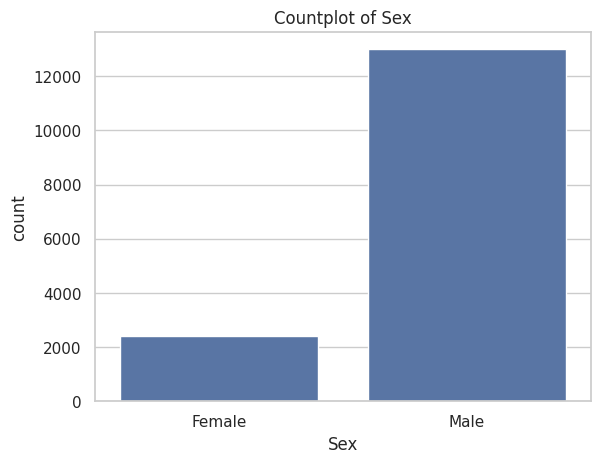

In [ ]:
snsplot = sns.countplot(x='Sex', data=df_protected_features)
snsplot.set_title("Countplot of Sex")

Sex_Summary = df_protected_features['Sex'].value_counts()

print(Sex_Summary)

#### 1.32 Protected Feature Marital Status

In [ ]:
df_protected_features['MaritalStatus'].unique()

array(['Single', 'Married', 'Widow', 'Divorced'], dtype=object)

In [ ]:
df_protected_features['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,10625
Single,4684
Divorced,76
Widow,35


MaritalStatus
Married     10625
Single       4684
Divorced       76
Widow          35
Name: count, dtype: int64


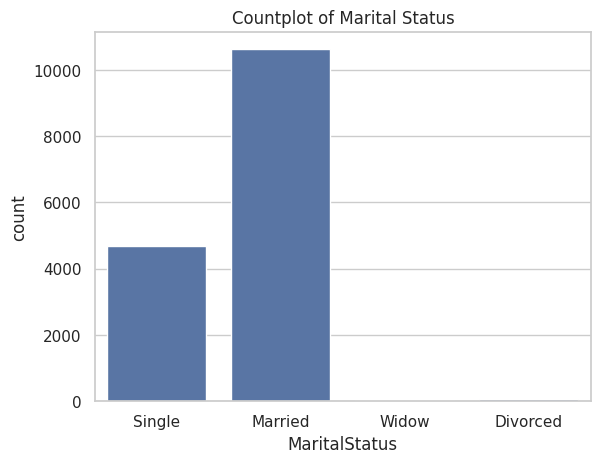

In [ ]:
snsplot = sns.countplot(x='MaritalStatus', data=df_protected_features)
snsplot.set_title("Countplot of Marital Status")

Marital_Status_Summary = df_protected_features['MaritalStatus'].value_counts()

print(Marital_Status_Summary)

#### 1.33 Protected Feature Age

In [ ]:
bins = [0, 18, 29, 39, 49, 59, float('inf')]
labels = ['0-18', '19-29', '30-39', '40-49', '50-59', '59+']
df_protected_features['age_group'] = pd.cut(df_protected_features['Age'], bins=bins, labels=labels, right=True)

<ipython-input-202-07515c7cfd97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_protected_features['age_group'] = pd.cut(df_protected_features['Age'], bins=bins, labels=labels, right=True)


In [ ]:
df_protected_features['age_group'].unique()

['19-29', '30-39', '40-49', '59+', NaN, '50-59', '0-18']
Categories (6, object): ['0-18' < '19-29' < '30-39' < '40-49' < '50-59' < '59+']

In [ ]:
df_protected_features['age_group'].value_counts()

,count
age_group,
30-39,5041
40-49,3568
19-29,2860
50-59,2230
59+,1338
0-18,63


age_group
30-39    5041
40-49    3568
19-29    2860
50-59    2230
59+      1338
0-18       63
Name: count, dtype: int64


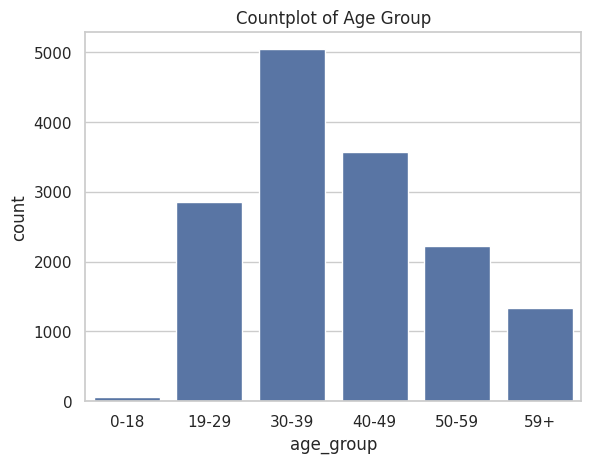

In [ ]:
snsplot = sns.countplot(x='age_group', data=df_protected_features)
snsplot.set_title("Countplot of Age Group")

Age_Group_Summary = df_protected_features['age_group'].value_counts()

print(Age_Group_Summary)

### 1.4 Object Datatype

In [ ]:
# Looking at object types to understand.
df_objects = df.select_dtypes(include=['object'])
df_objects.head()

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Fault,PolicyType,VehicleCategory,VehiclePrice,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Dec,Wednesday,Honda,Urban,Tuesday,Jan,Policy Holder,Sport - Liability,Sport,more than 69000,...,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Jan,Wednesday,Honda,Urban,Monday,Jan,Policy Holder,Sport - Collision,Sport,more than 69000,...,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Oct,Friday,Honda,Urban,Thursday,Nov,Policy Holder,Sport - Collision,Sport,more than 69000,...,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Jun,Saturday,Toyota,Rural,Friday,Jul,Third Party,Sedan - Liability,Sport,20000 to 29000,...,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Jan,Monday,Honda,Urban,Tuesday,Feb,Third Party,Sport - Collision,Sport,more than 69000,...,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision


In [ ]:
df_objects.nunique()

,0
Month,12
DayOfWeek,7
Make,19
AccidentArea,2
DayOfWeekClaimed,8
MonthClaimed,13
Fault,2
PolicyType,9
VehicleCategory,3
VehiclePrice,6


#### 1.41 Month

In [ ]:
df_objects['Month'].unique()

array(['Dec', 'Jan', 'Oct', 'Jun', 'Feb', 'Nov', 'Apr', 'Mar', 'Aug',
       'Jul', 'May', 'Sep'], dtype=object)

In [ ]:
df_objects['Month'].value_counts()

,count
Month,
Jan,1411
May,1367
Mar,1360
Jun,1321
Oct,1305
Dec,1285
Apr,1280
Feb,1266
Jul,1257


Distribution

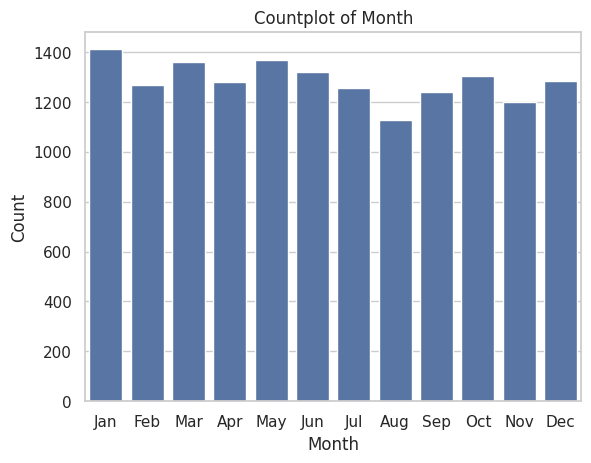

In [ ]:
# Define the order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create the count plot with the specified order
snsplot = sns.countplot(x='Month', data=df_objects, order=month_order)
snsplot.set_title("Countplot of Month")
snsplot.set_xlabel("Month")
snsplot.set_ylabel("Count")

# Show the plot
plt.show()

Distribution against Fraud

<ipython-input-211-79eaed405abe>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Month', y='FraudFound_P', data=df, order=month_order, ci=None, estimator=lambda x: sum(x) / len(x))


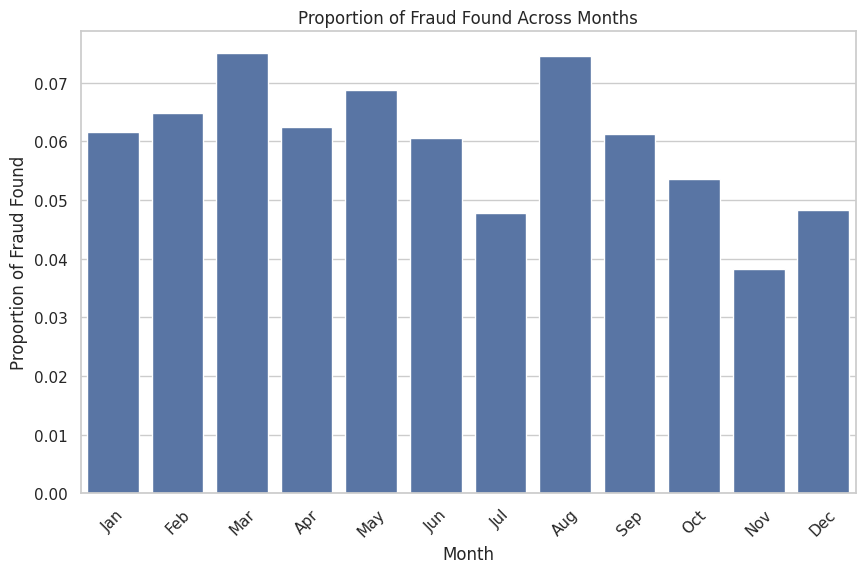

In [ ]:
# Bar plot to show proportion of FraudFound across months
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='Month', y='FraudFound_P', data=df, order=month_order, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Months")
plt.xlabel("Month")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=45)  # Rotate for readability
plt.show()

Exclude from model

Even though we see March and August are higher than other months. The porportion percentages are actually small and holds little impact.

#### 1.42 DayOfWeek

In [ ]:
df_objects['DayOfWeek'].unique()

array(['Wednesday', 'Friday', 'Saturday', 'Monday', 'Tuesday', 'Sunday',
       'Thursday'], dtype=object)

In [ ]:
df_objects['DayOfWeek'].value_counts()

,count
DayOfWeek,
Monday,2616
Friday,2445
Tuesday,2300
Thursday,2173
Wednesday,2159
Saturday,1982
Sunday,1745


Distribution

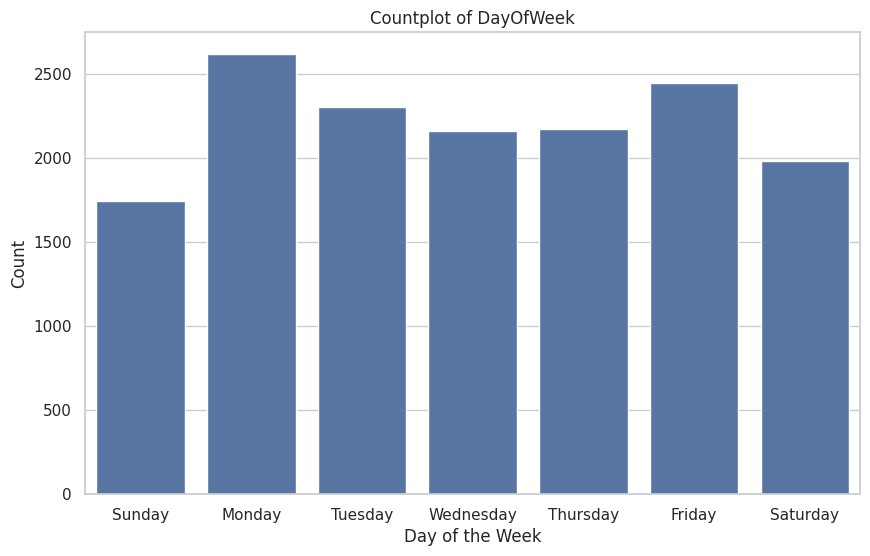

In [ ]:
# Define the order of days
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.figure(figsize=(10, 6))
# Create the count plot with the specified order
snsplot = sns.countplot(x='DayOfWeek', data=df_objects, order=day_order)
snsplot.set_title("Countplot of DayOfWeek")
snsplot.set_xlabel("Day of the Week")
snsplot.set_ylabel("Count")

# Show the plot
plt.show()


Distribution Against Fraud

<ipython-input-215-f5066471e7dd>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='DayOfWeek', y='FraudFound_P', data=df, order=day_order, ci=None, estimator=lambda x: sum(x) / len(x))


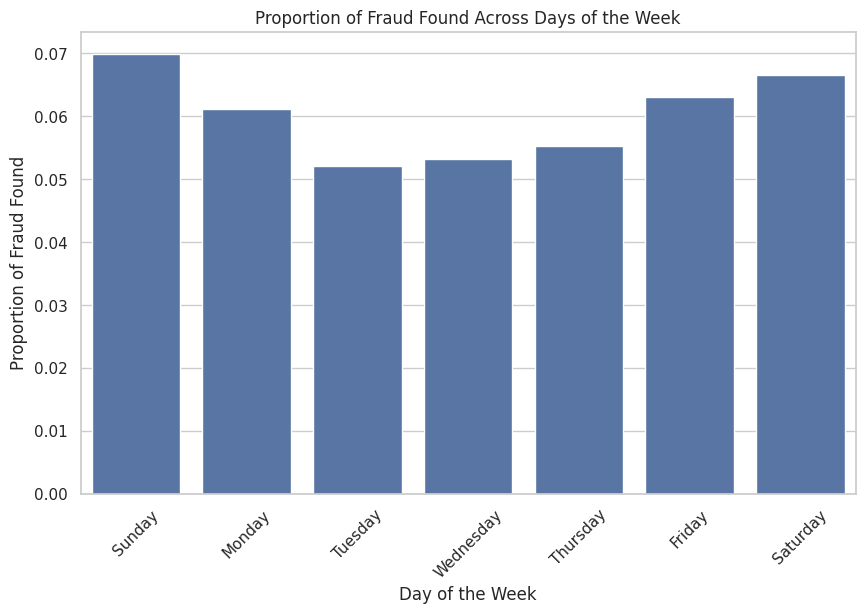

In [ ]:
# Bar plot to show proportion of FraudFound_P across days of the week
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='DayOfWeek', y='FraudFound_P', data=df, order=day_order, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Days of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

Exclude from model

We see that fraud activity is somewhat evenly distributed across each day.

#### 1.43 Make

In [ ]:
df_objects['Make'].unique()

array(['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac',
       'Accura', 'Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab',
       'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'],
      dtype=object)

In [ ]:
df_objects['Make'].value_counts()

,count
Make,
Pontiac,3837
Toyota,3121
Honda,2801
Mazda,2354
Chevrolet,1681
Accura,472
Ford,450
VW,283
Dodge,109


Distribution

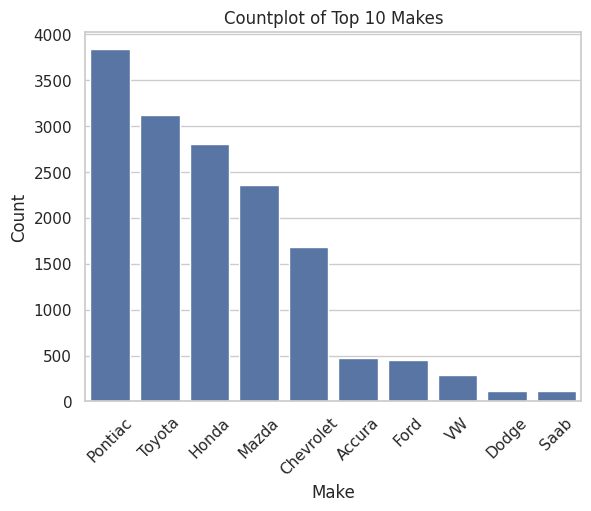

In [ ]:
top_10_makes = df_objects['Make'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 Makes
filtered_df = df_objects[df_objects['Make'].isin(top_10_makes)]

# Create the count plot
snsplot = sns.countplot(x='Make', data=filtered_df, order=top_10_makes)
snsplot.set_title("Countplot of Top 10 Makes")
snsplot.set_xlabel("Make")
snsplot.set_ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

Distribution Against Fraud

<ipython-input-219-cb5e121b5aa9>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Make', y='FraudFound_P', data=filtered_df, ci=None, estimator=lambda x: sum(x) / len(x))


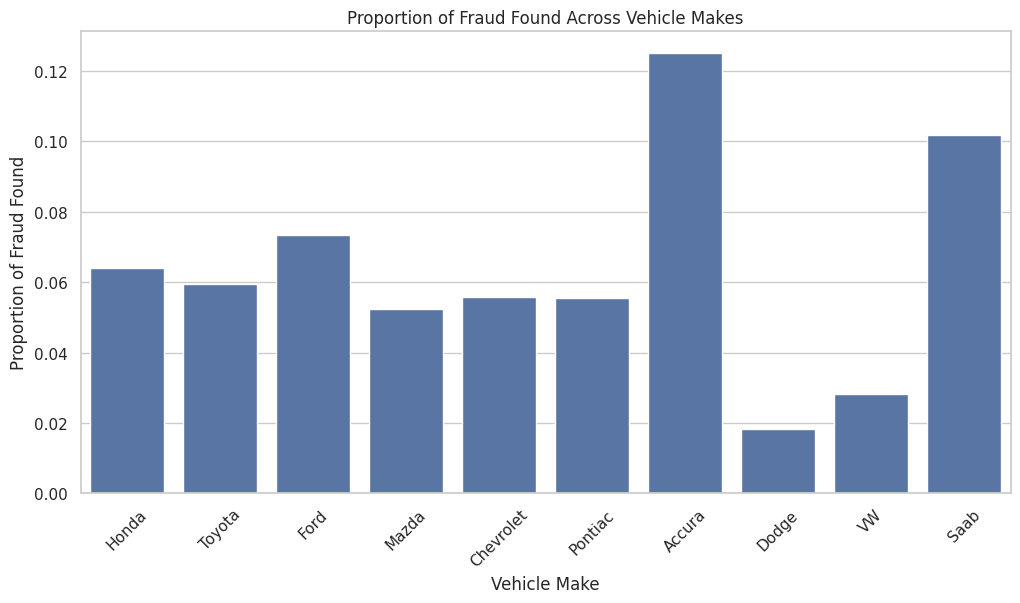

In [ ]:

filtered_df = df[df['Make'].isin(top_10_makes)]

# Step 3: Bar plot to show proportion of FraudFound_P across Makes
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='Make', y='FraudFound_P', data=filtered_df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Vehicle Makes")
plt.xlabel("Vehicle Make")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

Include in model

We see a significant gap in percentages between Makes. Mainly Acura and Saab has a higher instances of fraud.

#### 1.44 AccidentArea

In [ ]:
df_objects['AccidentArea'].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
df_objects['AccidentArea'].value_counts()

,count
AccidentArea,
Urban,13822
Rural,1598


Distribution

Text(0, 0.5, 'Count')

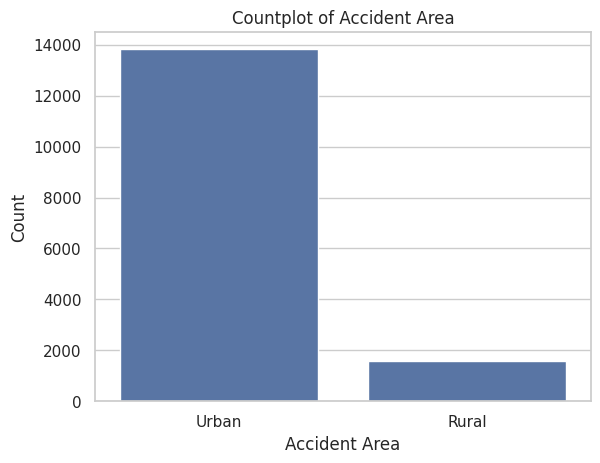

In [ ]:
snsplot = sns.countplot(x='AccidentArea', data=df_objects)
snsplot.set_title("Countplot of Accident Area")
snsplot.set_xlabel("Accident Area")
snsplot.set_ylabel("Count")

Distribution Against Fraud

<ipython-input-223-5009fb161157>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AccidentArea', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))


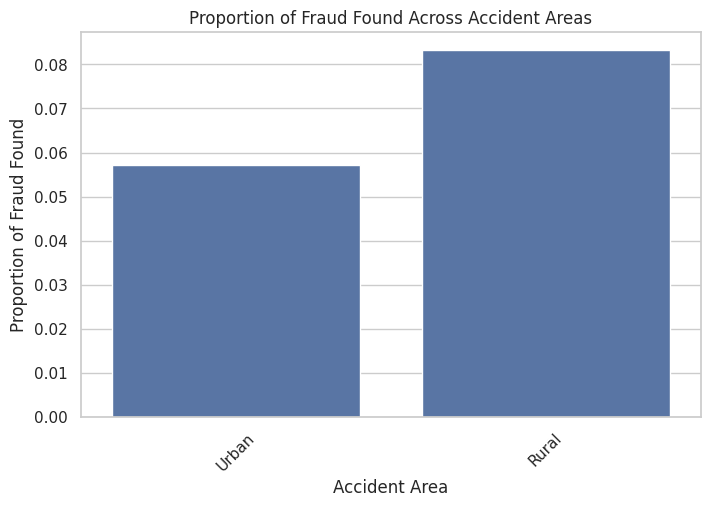

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Create the bar plot
sns.barplot(x='AccidentArea', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Accident Areas")
plt.xlabel("Accident Area")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

Include in model

We see that a higher porportion of Fraud found in accident areas of Rural over Urban.

#### 1.45 DayOfWeekClaimed

In [ ]:
df_objects['DayOfWeekClaimed'].unique()

array(['Tuesday', 'Monday', 'Thursday', 'Friday', 'Wednesday', 'Saturday',
       'Sunday', '0'], dtype=object)

In [ ]:
df_objects['DayOfWeekClaimed'].value_counts()

,count
DayOfWeekClaimed,
Monday,3757
Tuesday,3375
Wednesday,2951
Thursday,2660
Friday,2497
Saturday,127
Sunday,52
0,1


Distribution Against Fraud

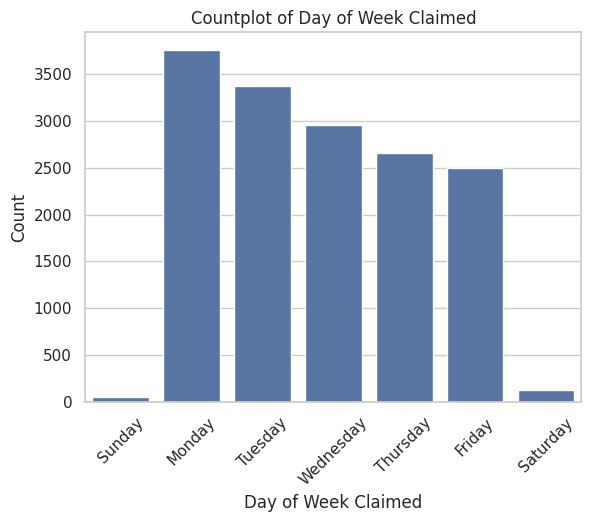

In [ ]:
# Define the correct order of days
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Filter out empty or 0 values
filtered_df = df_objects[df_objects['DayOfWeekClaimed'].isin(day_order)]

# Create the count plot with the specified order
snsplot = sns.countplot(x='DayOfWeekClaimed', data=filtered_df, order=day_order)
snsplot.set_title("Countplot of Day of Week Claimed")
snsplot.set_xlabel("Day of Week Claimed")
snsplot.set_ylabel("Count")

plt.xticks(rotation=45)
# Show the plot
plt.show()

Distribution Against Fraud

<ipython-input-227-19d7daab1e72>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='DayOfWeekClaimed', y='FraudFound_P', data=df, order=day_order, ci=None, estimator=lambda x: sum(x) / len(x))


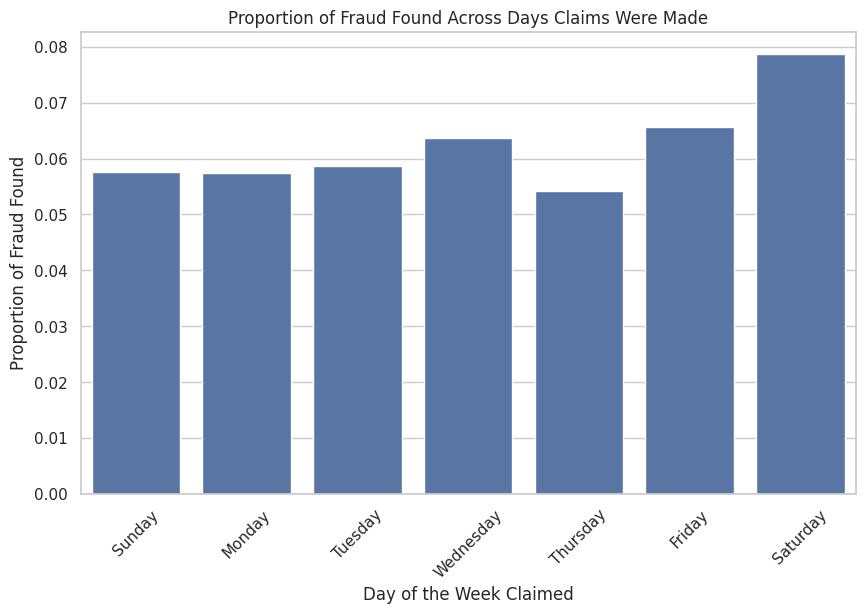

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='DayOfWeekClaimed', y='FraudFound_P', data=df, order=day_order, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Days Claims Were Made")
plt.xlabel("Day of the Week Claimed")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

Exclude from model

Even though we Saturday has a uptick in porportion of fraud found. It is all somewhat evenly distributed across all days of the week.

#### 1.46 MonthClaimed

In [ ]:
df_objects['MonthClaimed'].unique()

array(['Jan', 'Nov', 'Jul', 'Feb', 'Mar', 'Dec', 'Apr', 'Aug', 'May',
       'Jun', 'Sep', 'Oct', '0'], dtype=object)

In [ ]:
df_objects['MonthClaimed'].value_counts()

,count
MonthClaimed,
Jan,1446
May,1411
Mar,1348
Oct,1339
Jun,1293
Feb,1287
Nov,1285
Apr,1271
Sep,1242


Distribution

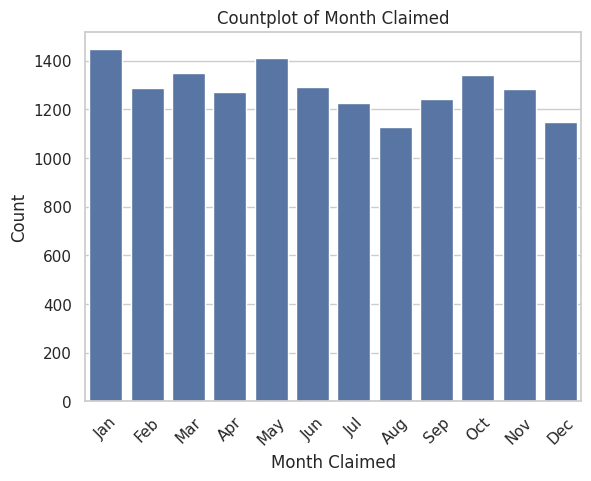

In [ ]:
# Define the correct order of abbreviated months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Filter out rows with null or 0 in the 'MonthClaimed' column
filtered_df = df_objects[df_objects['MonthClaimed'].isin(month_order)]

# Create the count plot with the specified order
snsplot = sns.countplot(x='MonthClaimed', data=filtered_df, order=month_order)
snsplot.set_title("Countplot of Month Claimed")
snsplot.set_xlabel("Month Claimed")
snsplot.set_ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

Distribution Against Fraud

<ipython-input-231-c6d10ebab1d8>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='MonthClaimed', y='FraudFound_P', data=df, order=month_order, ci=None, estimator=lambda x: sum(x) / len(x))


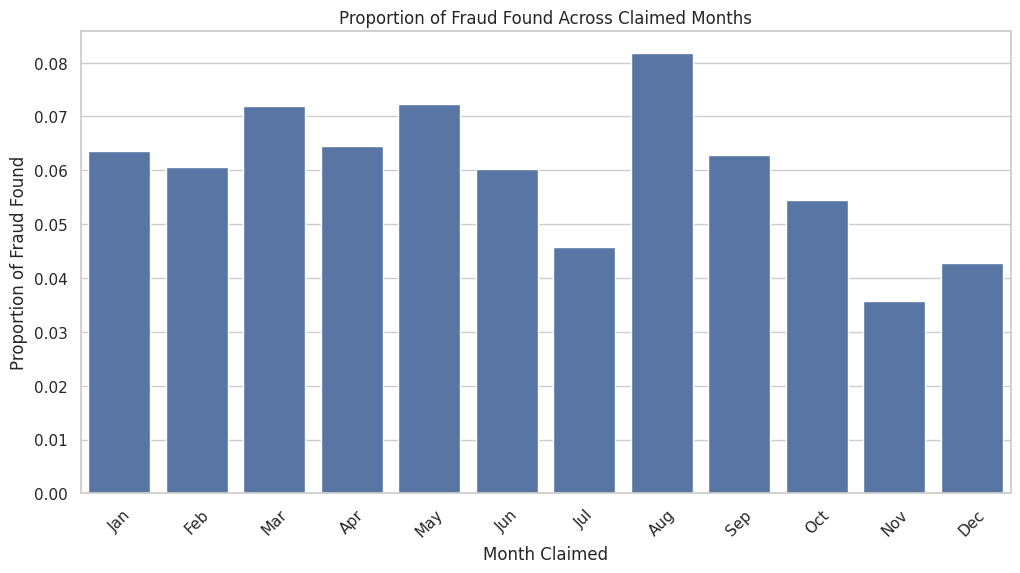

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='MonthClaimed', y='FraudFound_P', data=df, order=month_order, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Claimed Months")
plt.xlabel("Month Claimed")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

Exclude from model

Similar to prior analysis we can't use this for our model predictions because months are slightly porportion different in scale of value.

#### 1.47 Fault

In [ ]:
df_objects['Fault'].unique()

array(['Policy Holder', 'Third Party'], dtype=object)

In [ ]:
def_object_fault = df_objects['Fault'].value_counts()

Distribution

Text(0, 0.5, 'Count')

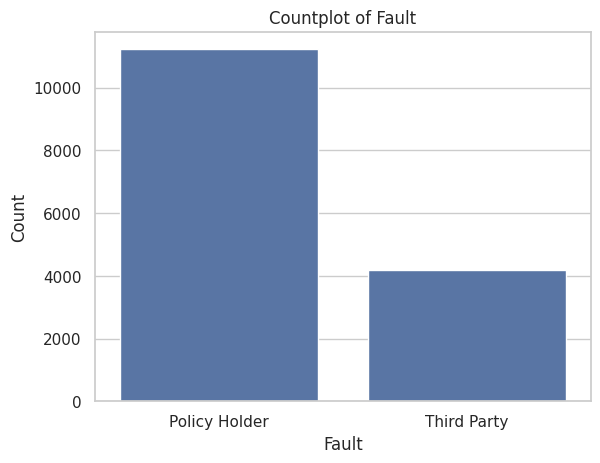

In [ ]:
snsplot = sns.countplot(x='Fault', data=df_objects)
snsplot.set_title("Countplot of Fault")
snsplot.set_xlabel("Fault")
snsplot.set_ylabel("Count")

Distribution Against Fraud

<ipython-input-235-4b37a77de441>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Fault', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))


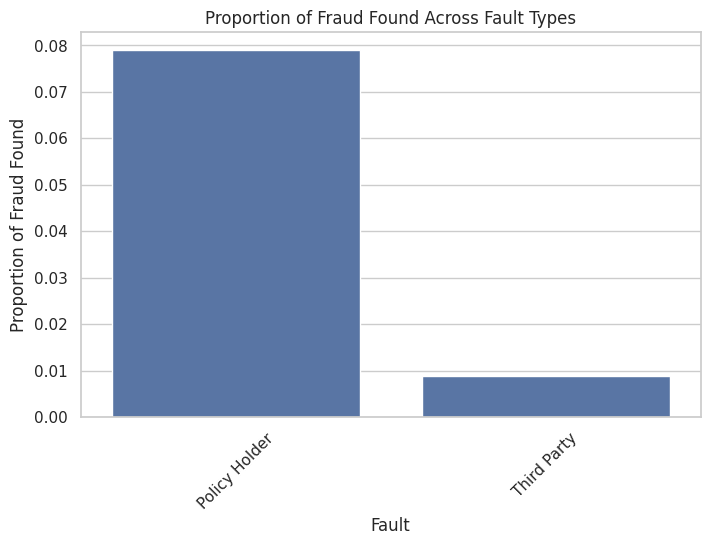

In [ ]:
# Bar plot to show proportion of FraudFound_P across Fault types
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Create the bar plot
sns.barplot(x='Fault', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Fault Types")
plt.xlabel("Fault")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

Include in model

This shows that majority of the policy holder when at fault is tied into having fraud found. As third party wouldnt target another insurance company as much for fraud as they won't have as much benefit in collect money.

#### 1.48 PolicyType

In [ ]:
df_objects['PolicyType'].unique()

array(['Sport - Liability', 'Sport - Collision', 'Sedan - Liability',
       'Utility - All Perils', 'Sedan - All Perils', 'Sedan - Collision',
       'Utility - Collision', 'Utility - Liability', 'Sport - All Perils'],
      dtype=object)

In [ ]:
df_objects['PolicyType'].value_counts()

,count
PolicyType,
Sedan - Collision,5584
Sedan - Liability,4987
Sedan - All Perils,4087
Sport - Collision,348
Utility - All Perils,340
Utility - Collision,30
Sport - All Perils,22
Utility - Liability,21
Sport - Liability,1


Distribution

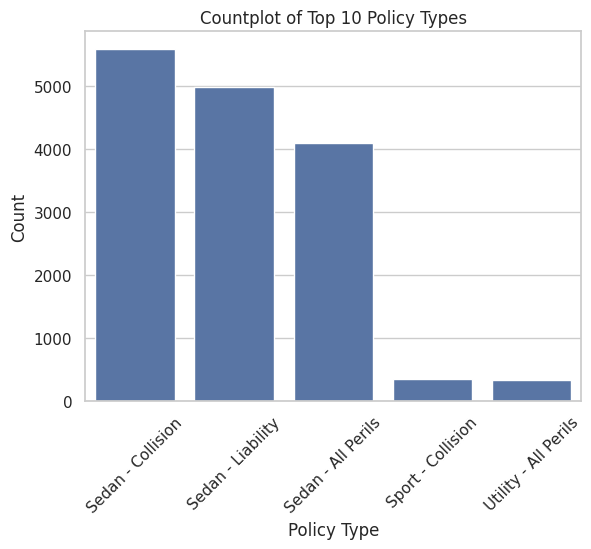

In [ ]:
# Get the top 10 most frequent Policy Types
top_5_policy_types = df_objects['PolicyType'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 10 Policy Types
filtered_df = df_objects[df_objects['PolicyType'].isin(top_5_policy_types)]

# Create the count plot for the top 10 Policy Types
snsplot = sns.countplot(x='PolicyType', data=filtered_df, order=top_5_policy_types)
snsplot.set_title("Countplot of Top 10 Policy Types")
snsplot.set_xlabel("Policy Type")
snsplot.set_ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

Distribution Against Fraud

<ipython-input-239-0db20446b742>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='PolicyType', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))


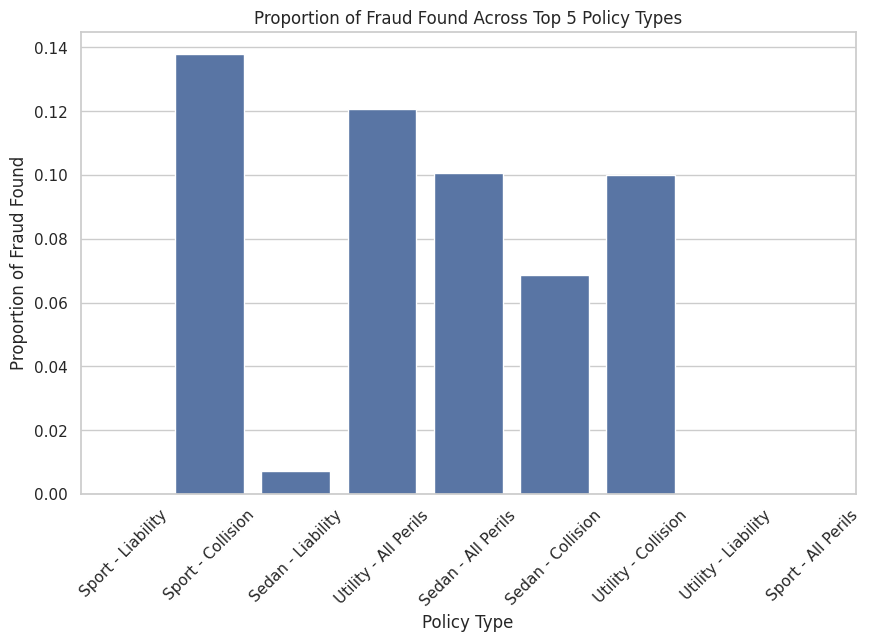

In [ ]:

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='PolicyType', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Top 5 Policy Types")
plt.xlabel("Policy Type")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

Include in model

We see that cetain policy types have significant involvement with Fraud. Such as Sport-Collision and Utility-All Perils.

#### 1.49 VehicleCategory

In [ ]:
df_objects['VehicleCategory'].unique()

array(['Sport', 'Utility', 'Sedan'], dtype=object)

In [ ]:
df_objects['VehicleCategory'].value_counts()

,count
VehicleCategory,
Sedan,9671
Sport,5358
Utility,391


Distribution

Text(0, 0.5, 'Count')

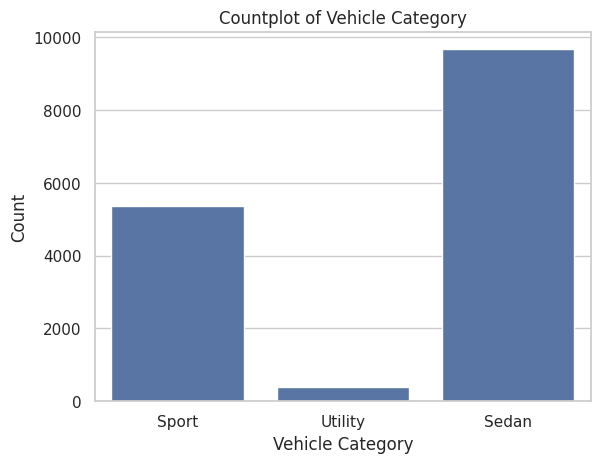

In [ ]:
snsplot = sns.countplot(x='VehicleCategory', data=df_objects)
snsplot.set_title("Countplot of Vehicle Category")
snsplot.set_xlabel("Vehicle Category")
snsplot.set_ylabel("Count")

Distribution Against Fraud

<ipython-input-243-31f1398a25f1>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='VehicleCategory', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))


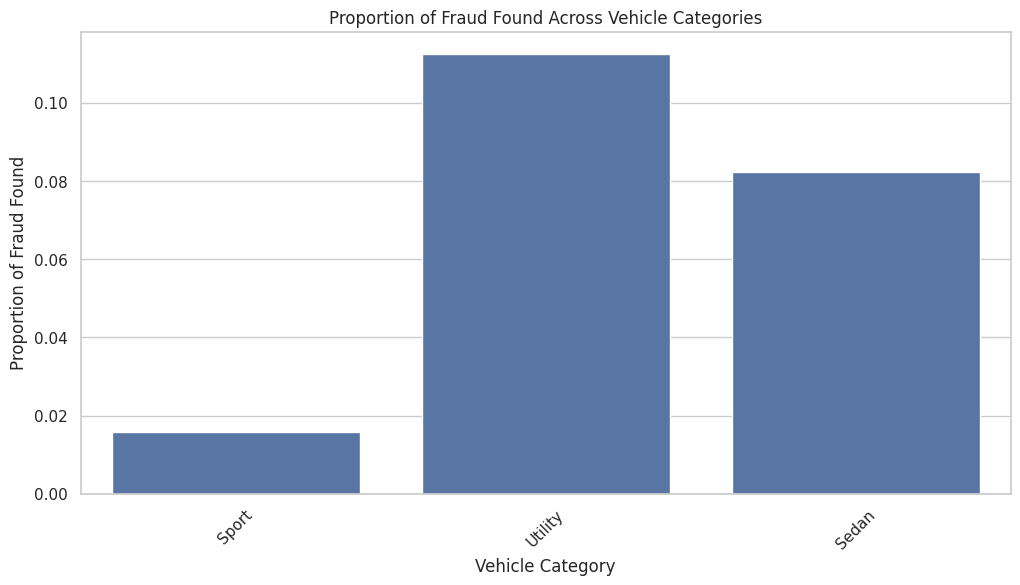

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='VehicleCategory', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Vehicle Categories")
plt.xlabel("Vehicle Category")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

Include in model

We see fraud found in Utility and Sedan vehicles more commonly. Sedan is generally used while Utility vehicles are for commerical use and many forms of accidents can occur.

#### 1.411 VehiclePrice

In [ ]:
df_objects['VehiclePrice'].unique()

array(['more than 69000', '20000 to 29000', '30000 to 39000',
       'less than 20000', '40000 to 59000', '60000 to 69000'],
      dtype=object)

In [ ]:
df_objects['VehiclePrice'].value_counts()

,count
VehiclePrice,
20000 to 29000,8079
30000 to 39000,3533
more than 69000,2164
less than 20000,1096
40000 to 59000,461
60000 to 69000,87


Distribution

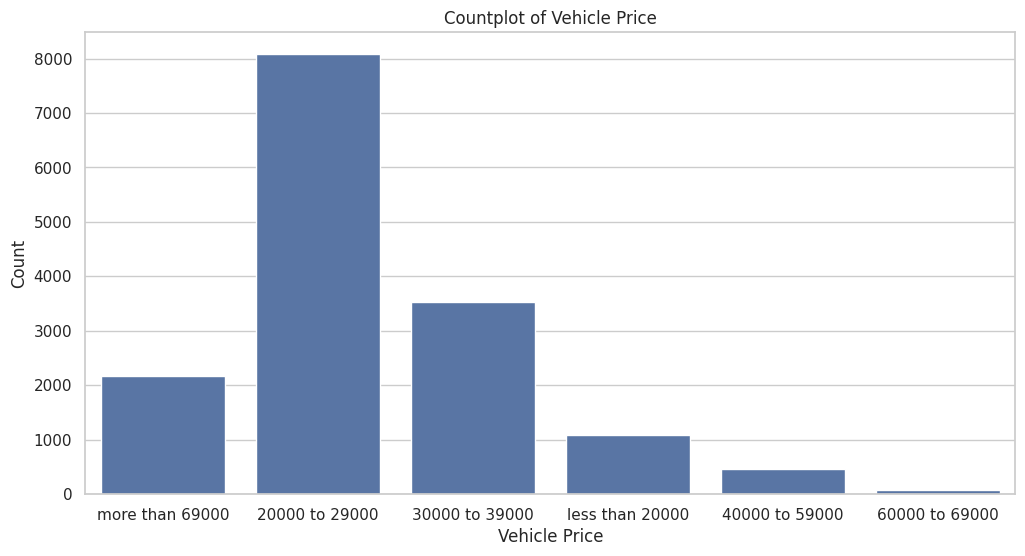

In [ ]:
# Set the figure size (e.g., 12 inches wide by 6 inches high)
plt.figure(figsize=(12, 6))

# Create the count plot
snsplot = sns.countplot(x='VehiclePrice', data=df_objects)
snsplot.set_title("Countplot of Vehicle Price")
snsplot.set_xlabel("Vehicle Price")
snsplot.set_ylabel("Count")

# Show the plot
plt.show()

Distribution Against Fraud

<ipython-input-247-3ba94bc058cb>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='VehiclePrice', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))


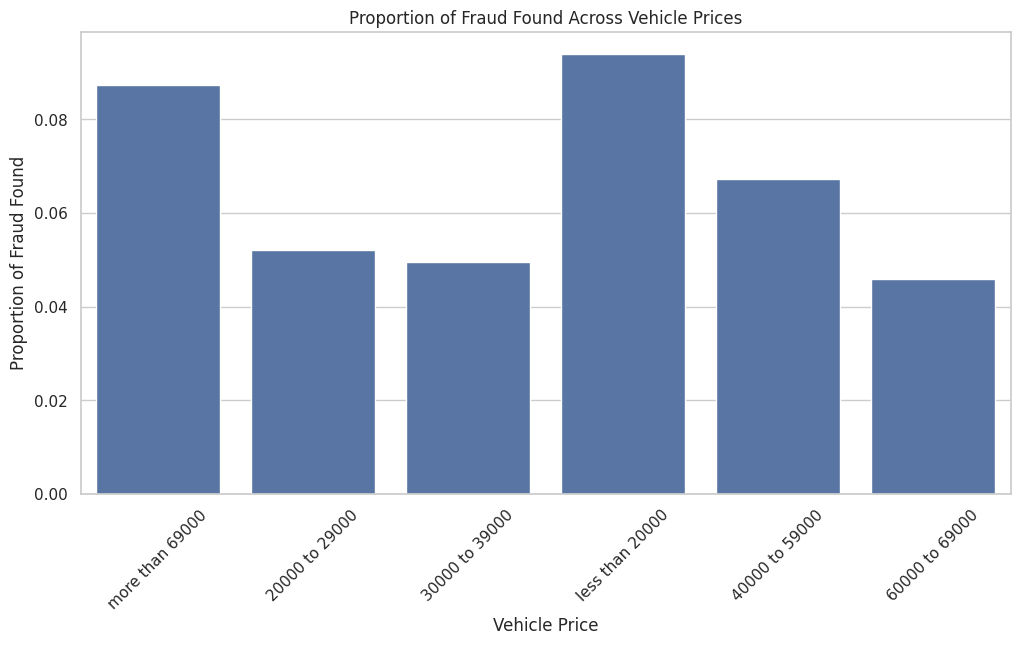

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Use 'VehiclePriceRange' if binning is applied, otherwise use 'VehiclePrice'
sns.barplot(x='VehiclePrice', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Vehicle Prices")
plt.xlabel("Vehicle Price")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

Include in model

Similar to what we see with vehicle types. Sedans during this time would cost 20,000 or less. While Utility vehicles are more expensive. Thus 69,000 and over would make sense.

#### 1.412 Days_Policy_Accident

In [ ]:
df_objects['Days_Policy_Accident'].unique()

array(['more than 30', '15 to 30', 'none', '1 to 7', '8 to 15'],
      dtype=object)

In [ ]:
df_objects['Days_Policy_Accident'].value_counts()

,count
Days_Policy_Accident,
more than 30,15247
none,55
8 to 15,55
15 to 30,49
1 to 7,14


Distribution

Text(0, 0.5, 'Count')

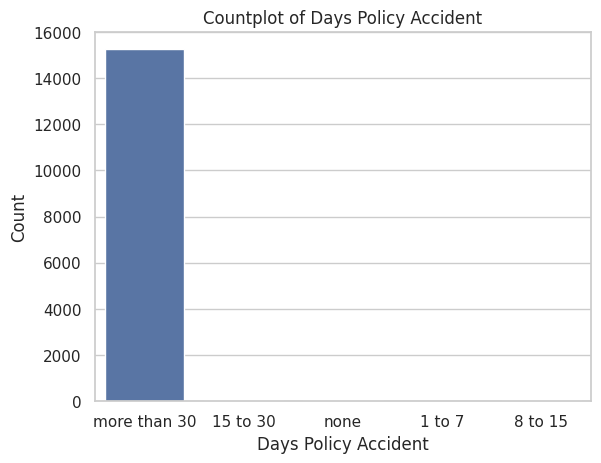

In [ ]:
snsplot = sns.countplot(x='Days_Policy_Accident', data=df_objects)
snsplot.set_title("Countplot of Days Policy Accident")
snsplot.set_xlabel("Days Policy Accident")
snsplot.set_ylabel("Count")

Distribution Against Fraud

<ipython-input-251-66e5fdc77c8b>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Days_Policy_Accident', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))


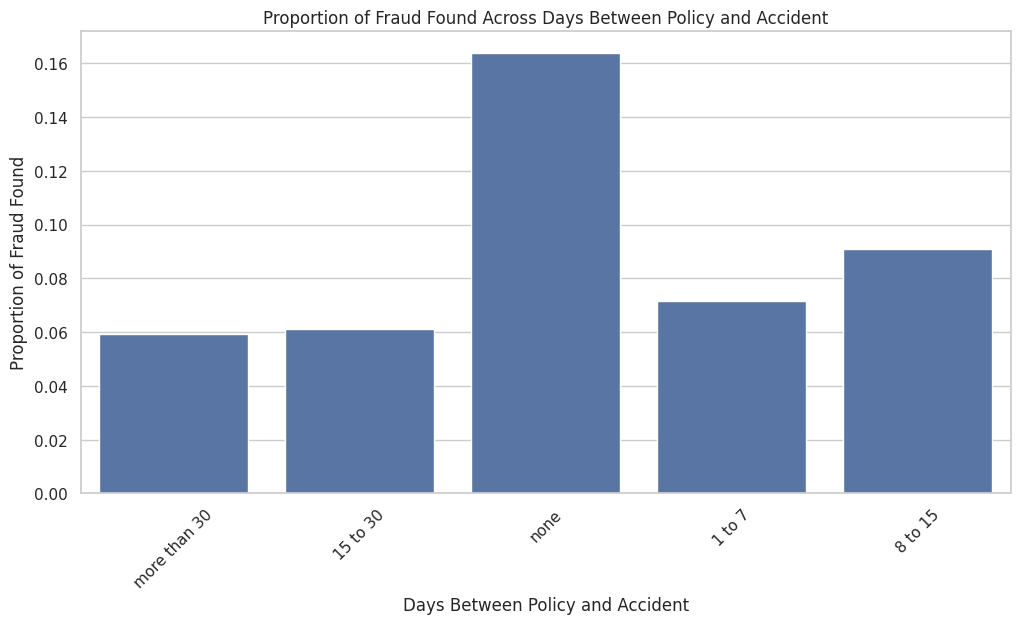

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='Days_Policy_Accident', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Days Between Policy and Accident")
plt.xlabel("Days Between Policy and Accident")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

Include in model

It shows that new policy owners have a significant higher chance to cause a fraud claim.

#### 1.413 Days_Policy_Claim

In [ ]:
df_objects['Days_Policy_Claim'].unique()

array(['more than 30', '15 to 30', '8 to 15', 'none'], dtype=object)

In [ ]:
df_objects['Days_Policy_Claim'].value_counts()

,count
Days_Policy_Claim,
more than 30,15342
15 to 30,56
8 to 15,21
none,1


Distribution

Text(0, 0.5, 'Count')

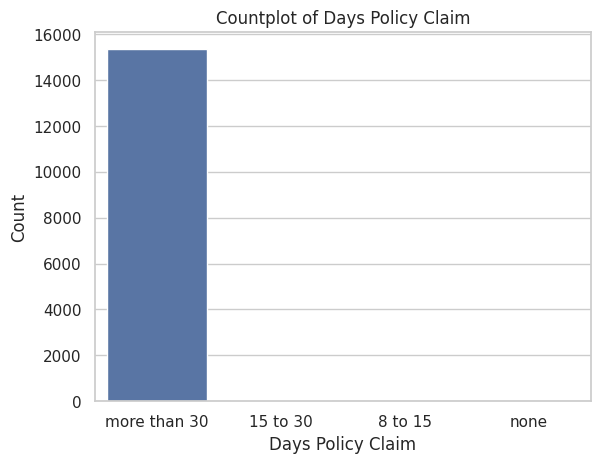

In [ ]:
snsplot = sns.countplot(x='Days_Policy_Claim', data=df_objects)
snsplot.set_title("Countplot of Days Policy Claim")
snsplot.set_xlabel("Days Policy Claim")
snsplot.set_ylabel("Count")

Distribution Against Fraud

<ipython-input-255-be8555b67d2c>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Days_Policy_Claim', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))


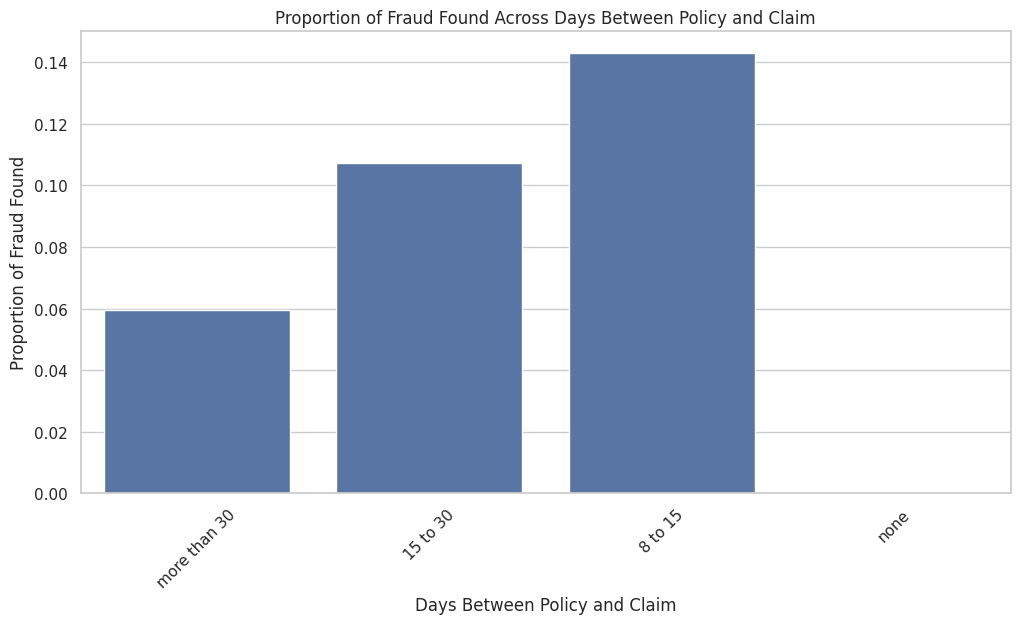

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='Days_Policy_Claim', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Days Between Policy and Claim")
plt.xlabel("Days Between Policy and Claim")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

Include in model

We see that dats between policy and claim, the shorter it is the more likely it has fraud activity. Which backs up what we have seen prior.

#### 1.414 PastNumberOfClaims

In [ ]:
df_objects['PastNumberOfClaims'].unique()

array(['none', '1', '2 to 4', 'more than 4'], dtype=object)

In [ ]:
df_objects['PastNumberOfClaims'].value_counts()

,count
PastNumberOfClaims,
2 to 4,5485
none,4352
1,3573
more than 4,2010


Distribution

Text(0, 0.5, 'Count')

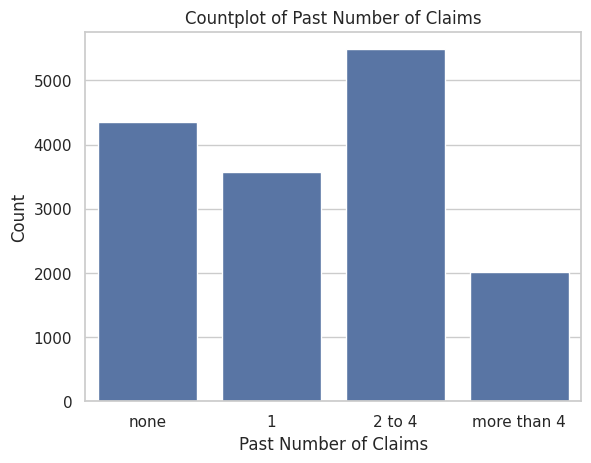

In [ ]:
snsplot = sns.countplot(x='PastNumberOfClaims', data=df_objects)
snsplot.set_title("Countplot of Past Number of Claims")
snsplot.set_xlabel("Past Number of Claims")
snsplot.set_ylabel("Count")

Distribution Against Fraud

<ipython-input-259-7a8f03cb02eb>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='PastNumberOfClaims', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))


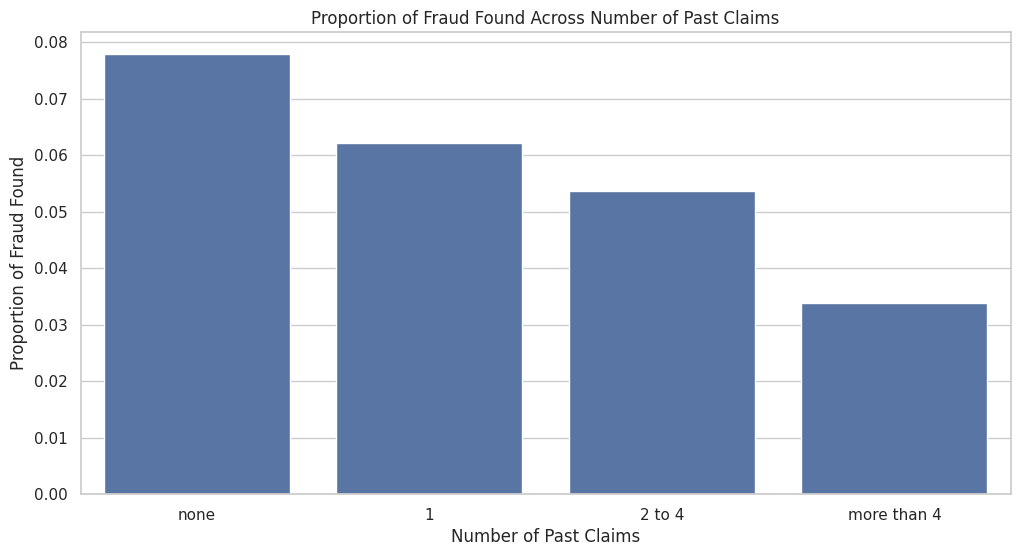

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='PastNumberOfClaims', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Number of Past Claims")
plt.xlabel("Number of Past Claims")
plt.ylabel("Proportion of Fraud Found")
plt.show()

Include in model

Policy holders that having low or no claims have potential for fraud to be detected.

#### 1.415 AgeOfVehicle

In [ ]:
df_objects['AgeOfVehicle'].unique()

array(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
       '4 years', '2 years'], dtype=object)

In [ ]:
df_objects['AgeOfVehicle'].value_counts()

,count
AgeOfVehicle,
7 years,5807
more than 7,3981
6 years,3448
5 years,1357
new,373
4 years,229
3 years,152
2 years,73


Distribution

Text(0, 0.5, 'Count')

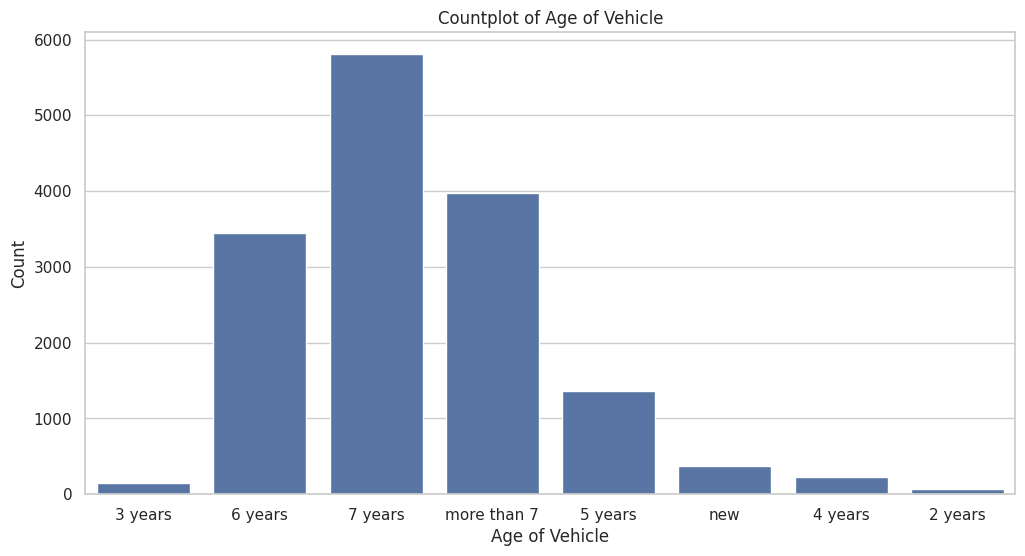

In [ ]:
plt.figure(figsize=(12, 6))

snsplot = sns.countplot(x='AgeOfVehicle', data=df_objects)
snsplot.set_title("Countplot of Age of Vehicle")
snsplot.set_xlabel("Age of Vehicle")
snsplot.set_ylabel("Count")

Distribution Against Fraud

<ipython-input-263-6ee1f732a586>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AgeOfVehicle', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))


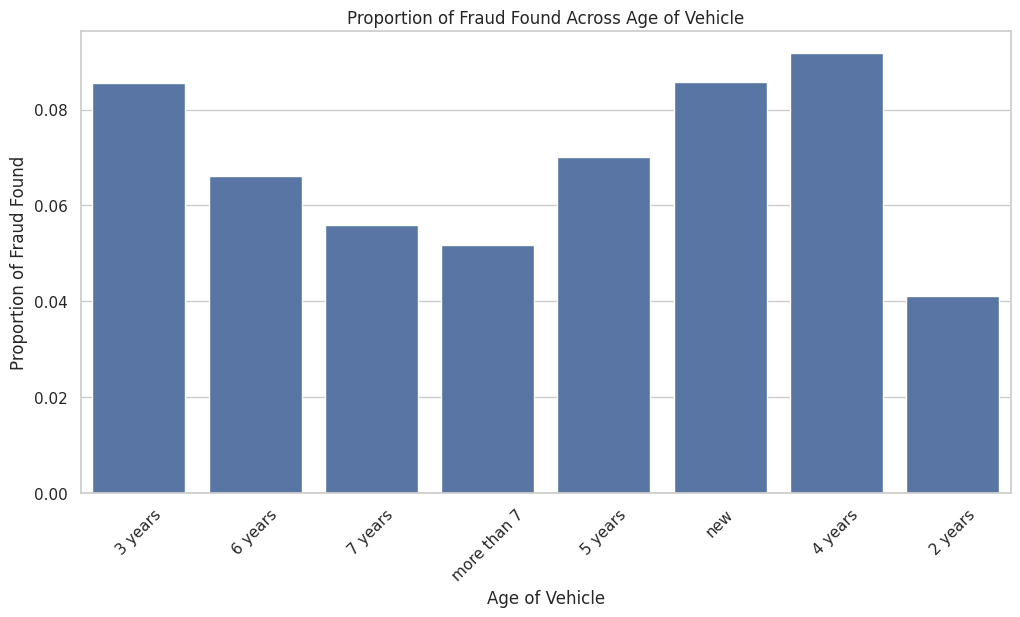

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='AgeOfVehicle', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Age of Vehicle")
plt.xlabel("Age of Vehicle")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

Include in model

Shows that newer vehicles have been involved in fraud claims compared to older.

#### 1.416 AgeOfPolicyHolder

In [ ]:
df_objects['AgeOfPolicyHolder'].unique()

array(['26 to 30', '31 to 35', '41 to 50', '51 to 65', '21 to 25',
       '36 to 40', '16 to 17', 'over 65', '18 to 20'], dtype=object)

In [ ]:
df_objects['AgeOfPolicyHolder'].value_counts()

,count
AgeOfPolicyHolder,
31 to 35,5593
36 to 40,4043
41 to 50,2828
51 to 65,1392
26 to 30,613
over 65,508
16 to 17,320
21 to 25,108
18 to 20,15


Distribution

Text(0, 0.5, 'Count')

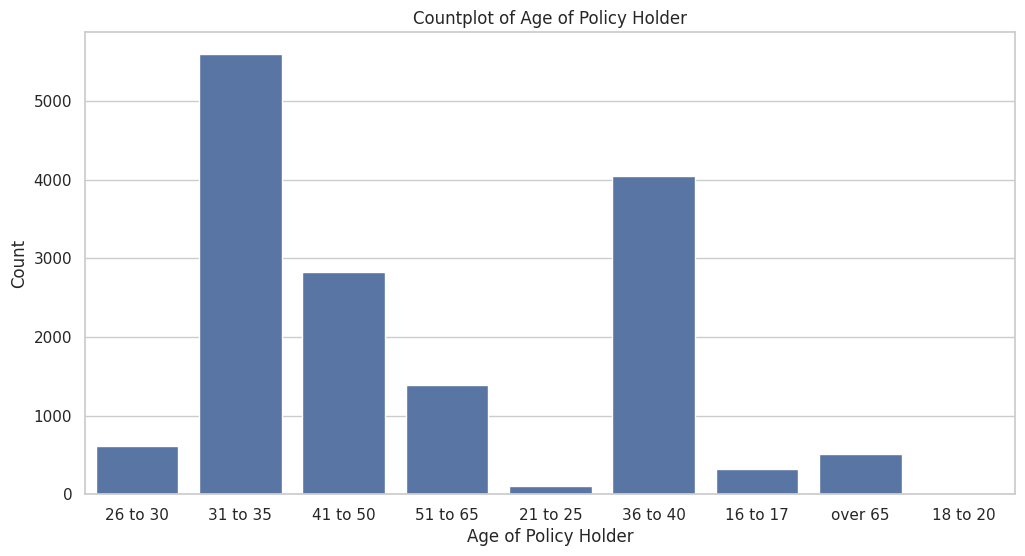

In [ ]:
plt.figure(figsize=(12, 6))

snsplot = sns.countplot(x='AgeOfPolicyHolder', data=df_objects)
snsplot.set_title("Countplot of Age of Policy Holder")
snsplot.set_xlabel("Age of Policy Holder")
snsplot.set_ylabel("Count")

Exclude Protected Feature

#### 1.417 PoliceReportFiled

In [ ]:
df_objects['PoliceReportFiled'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df_objects['PoliceReportFiled'].value_counts()

,count
PoliceReportFiled,
No,14992
Yes,428


Distribution

Text(0, 0.5, 'Count')

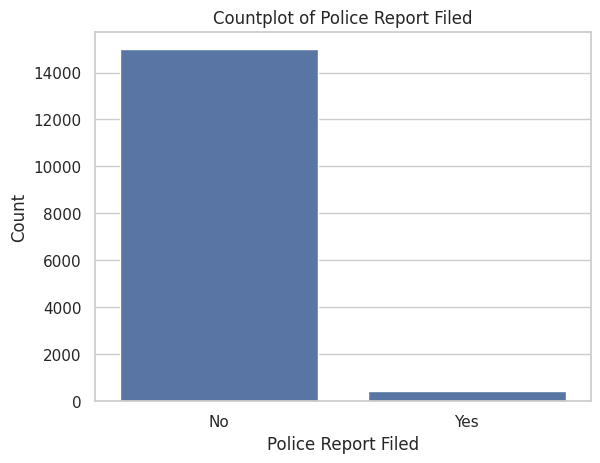

In [ ]:
snsplot = sns.countplot(x='PoliceReportFiled', data=df_objects)
snsplot.set_title("Countplot of Police Report Filed")
snsplot.set_xlabel("Police Report Filed")
snsplot.set_ylabel("Count")

Distribution Against Fraud

<ipython-input-270-07fdc9c02468>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='PoliceReportFiled', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))


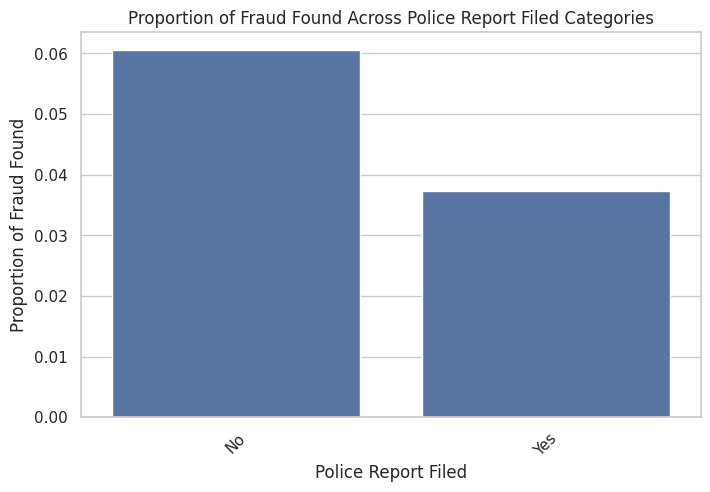

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Create the bar plot
sns.barplot(x='PoliceReportFiled', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Police Report Filed Categories")
plt.xlabel("Police Report Filed")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

Include in model

Police reports that weren't filed tend to have more fraud to be detected. Theory could be that scammers don't want the police involved.

#### 1.418 WitnessPresent

In [ ]:
df_objects['WitnessPresent'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df_objects['WitnessPresent'].value_counts()

,count
WitnessPresent,
No,15333
Yes,87


Distribution

Text(0, 0.5, 'Count')

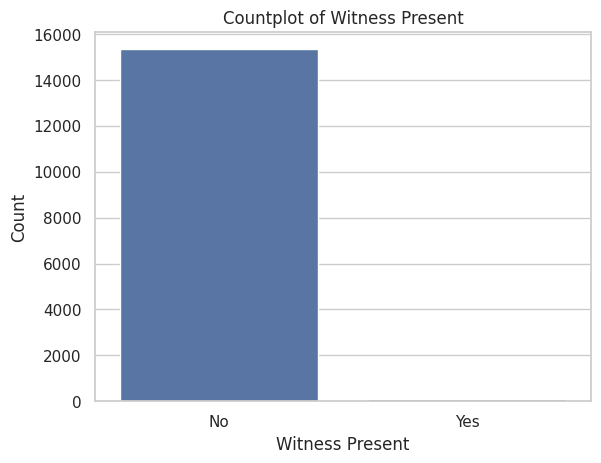

In [ ]:
snsplot = sns.countplot(x='WitnessPresent', data=df_objects)
snsplot.set_title("Countplot of Witness Present")
snsplot.set_xlabel("Witness Present")
snsplot.set_ylabel("Count")

Distribution AGainst Fraud

<ipython-input-274-36fc2e84f6a9>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='WitnessPresent', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))


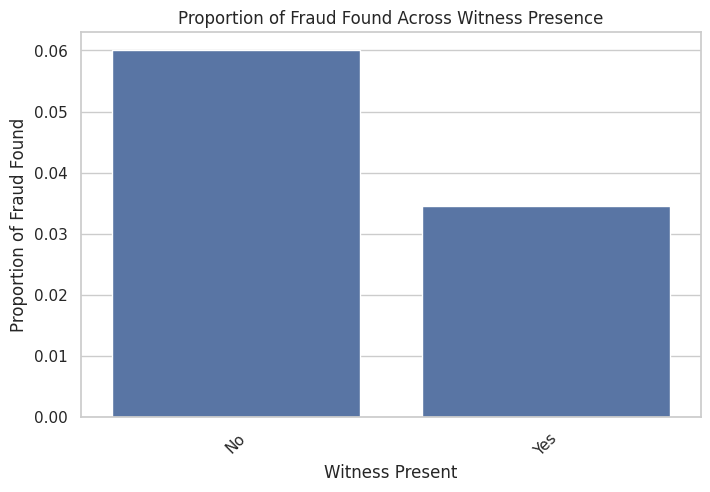

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Create the bar plot
sns.barplot(x='WitnessPresent', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Witness Presence")
plt.xlabel("Witness Present")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

Include in model

We see that no witnesses tend to have more instances of fraud. Classic case of he said she said.

#### 1.419 NumberOfSuppliments

In [ ]:
df_objects['NumberOfSuppliments'].unique()

array(['none', 'more than 5', '3 to 5', '1 to 2'], dtype=object)

In [ ]:
df_objects['NumberOfSuppliments'].value_counts()

,count
NumberOfSuppliments,
none,7047
more than 5,3867
1 to 2,2489
3 to 5,2017


Distribution

Text(0, 0.5, 'Count')

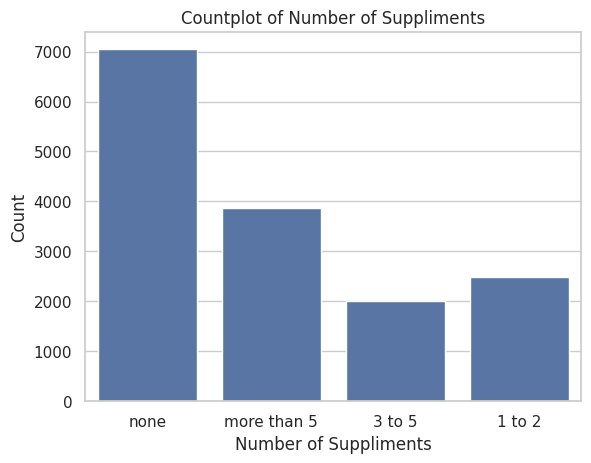

In [ ]:
snsplot = sns.countplot(x='NumberOfSuppliments', data=df_objects)
snsplot.set_title("Countplot of Number of Suppliments")
snsplot.set_xlabel("Number of Suppliments")
snsplot.set_ylabel("Count")

Distribution Against Fraud

<ipython-input-278-cdfebf5616d8>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='NumberOfSuppliments', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))


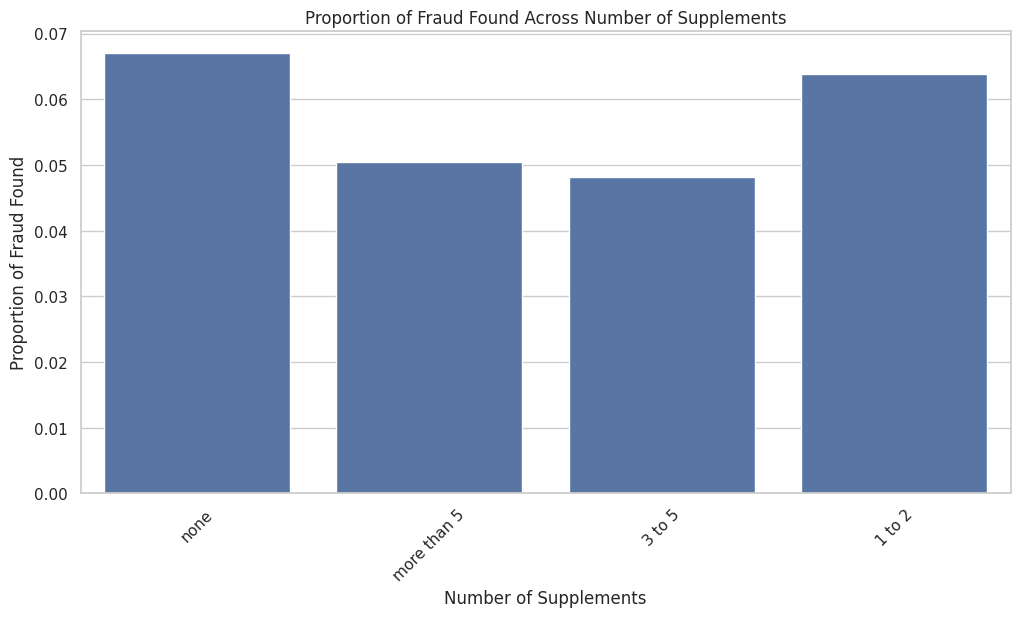

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='NumberOfSuppliments', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Number of Supplements")
plt.xlabel("Number of Supplements")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

Exclude from model

Somewhat even distributed and should not be taken into consideration.

#### 1.421 AddressChange_Claim

In [ ]:
df_objects['AddressChange_Claim'].unique()

array(['1 year', 'no change', '4 to 8 years', '2 to 3 years',
       'under 6 months'], dtype=object)

In [ ]:
df_objects['AddressChange_Claim'].value_counts()

,count
AddressChange_Claim,
no change,14324
4 to 8 years,631
2 to 3 years,291
1 year,170
under 6 months,4


Distribution

Text(0, 0.5, 'Count')

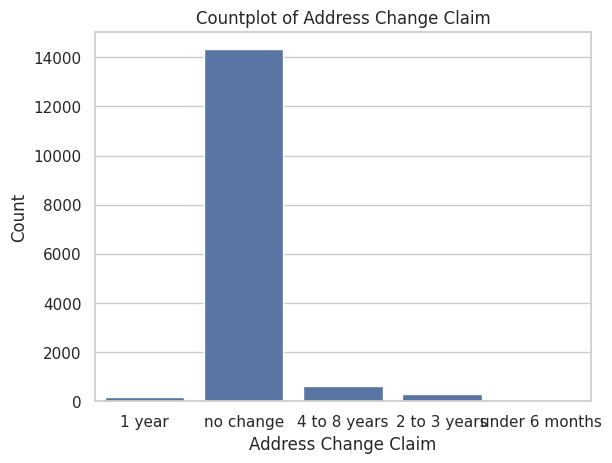

In [ ]:
snsplot = sns.countplot(x='AddressChange_Claim', data=df_objects)
snsplot.set_title("Countplot of Address Change Claim")
snsplot.set_xlabel("Address Change Claim")
snsplot.set_ylabel("Count")

Distribution Against Fraud

<ipython-input-282-8f19d07b6b99>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AddressChange_Claim', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))


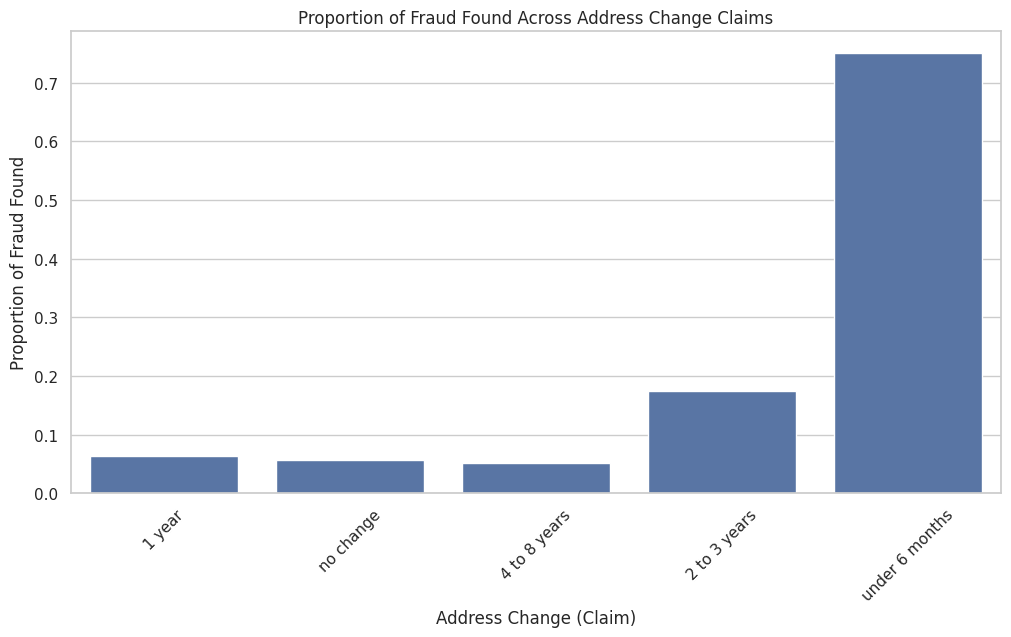

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='AddressChange_Claim', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Address Change Claims")
plt.xlabel("Address Change (Claim)")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

Include in model

Similar to the story we seen anything new or sudden tends to have fraud to happen. In this case under 6 months from changing address.

#### 1.422 NumberOfCars

In [ ]:
df_objects['NumberOfCars'].unique()

array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
      dtype=object)

In [ ]:
df_objects['NumberOfCars'].value_counts()

,count
NumberOfCars,
1 vehicle,14316
2 vehicles,709
3 to 4,372
5 to 8,21
more than 8,2


Distribution

Text(0, 0.5, 'Count')

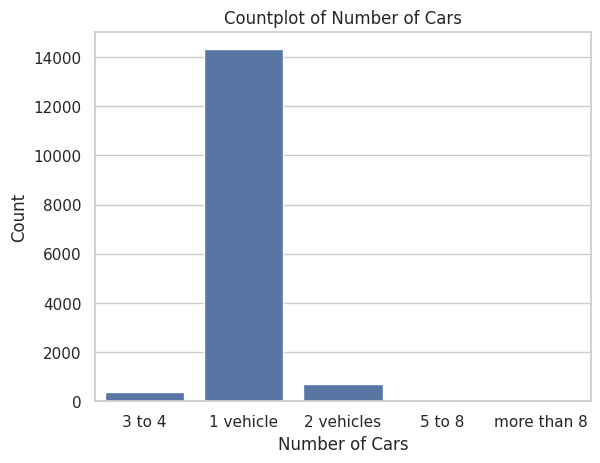

In [ ]:
snsplot = sns.countplot(x='NumberOfCars', data=df_objects)
snsplot.set_title("Countplot of Number of Cars")
snsplot.set_xlabel("Number of Cars")
snsplot.set_ylabel("Count")

Distribution Against Fraud

<ipython-input-286-0f7724205ed5>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='NumberOfCars', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))


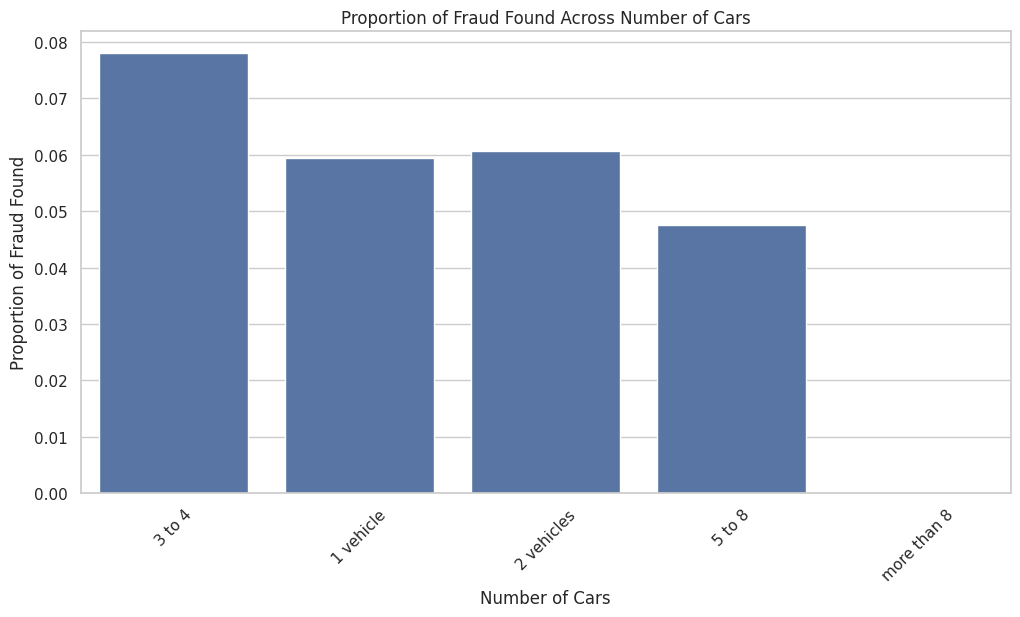

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='NumberOfCars', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Number of Cars")
plt.xlabel("Number of Cars")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

Exclude from model

Naturally when car accidents happen. 3-4 vehicles are expected to be involved.

#### 1.423 BasePolicy

In [ ]:
df_objects['BasePolicy'].unique()

array(['Liability', 'Collision', 'All Perils'], dtype=object)

In [ ]:
df_objects['BasePolicy'].value_counts()

,count
BasePolicy,
Collision,5962
Liability,5009
All Perils,4449


Distribution

Text(0, 0.5, 'Count')

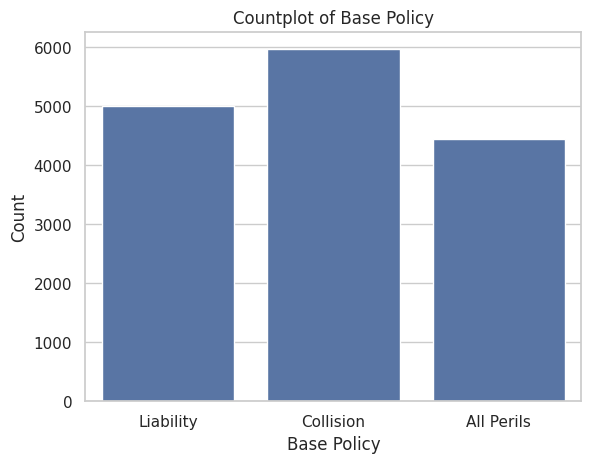

In [ ]:
snsplot = sns.countplot(x='BasePolicy', data=df_objects)
snsplot.set_title("Countplot of Base Policy")
snsplot.set_xlabel("Base Policy")
snsplot.set_ylabel("Count")

Distribution Against Fraud

<ipython-input-290-97097a7b56e0>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='BasePolicy', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))


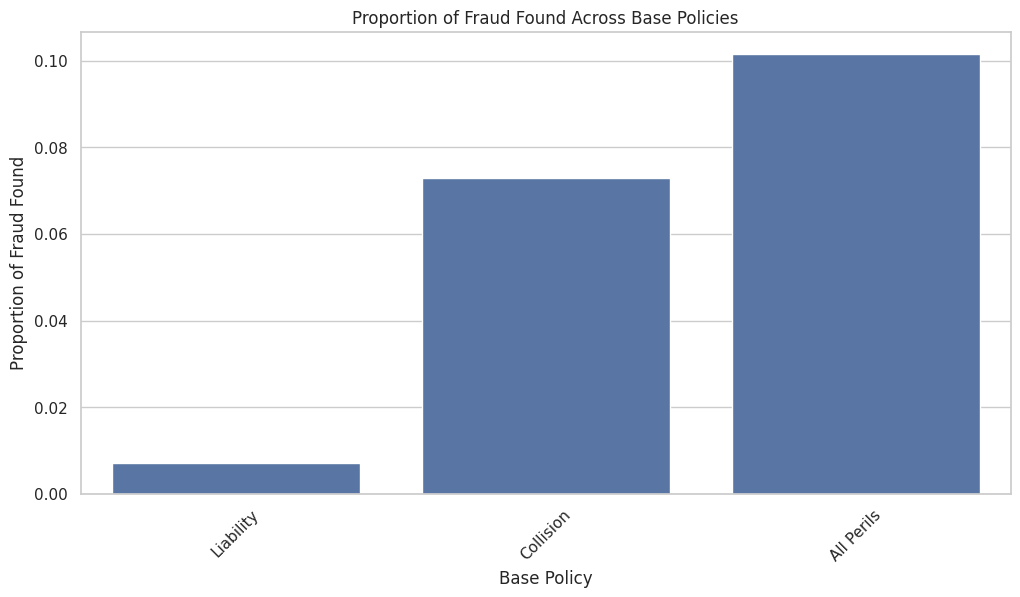

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='BasePolicy', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Base Policies")
plt.xlabel("Base Policy")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

Include in model

We see that All-Perils lead in fraud cases. As the insurance type covers both ends. Collison following as it presses the other party of causing the accident.

#### 1.424 AgentType

In [ ]:
df_objects['AgentType'].unique()

array(['External', 'Internal'], dtype=object)

In [ ]:
df_objects['AgentType'].value_counts()

,count
AgentType,
External,15179
Internal,241


Text(0, 0.5, 'Count')

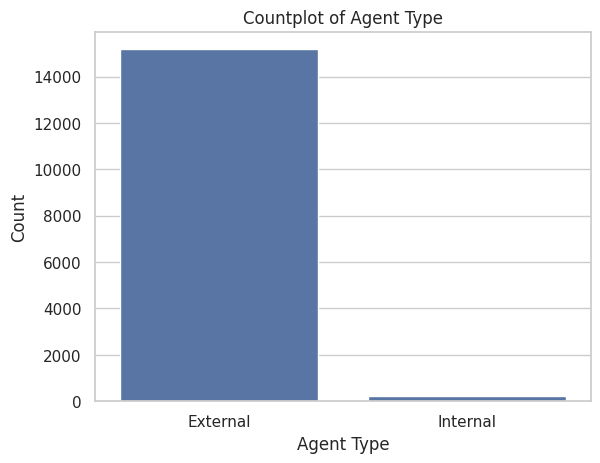

In [ ]:
snsplot = sns.countplot(x='AgentType', data=df_objects)
snsplot.set_title("Countplot of Agent Type")
snsplot.set_xlabel("Agent Type")
snsplot.set_ylabel("Count")

<ipython-input-294-3ad09a64cee5>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AgentType', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))


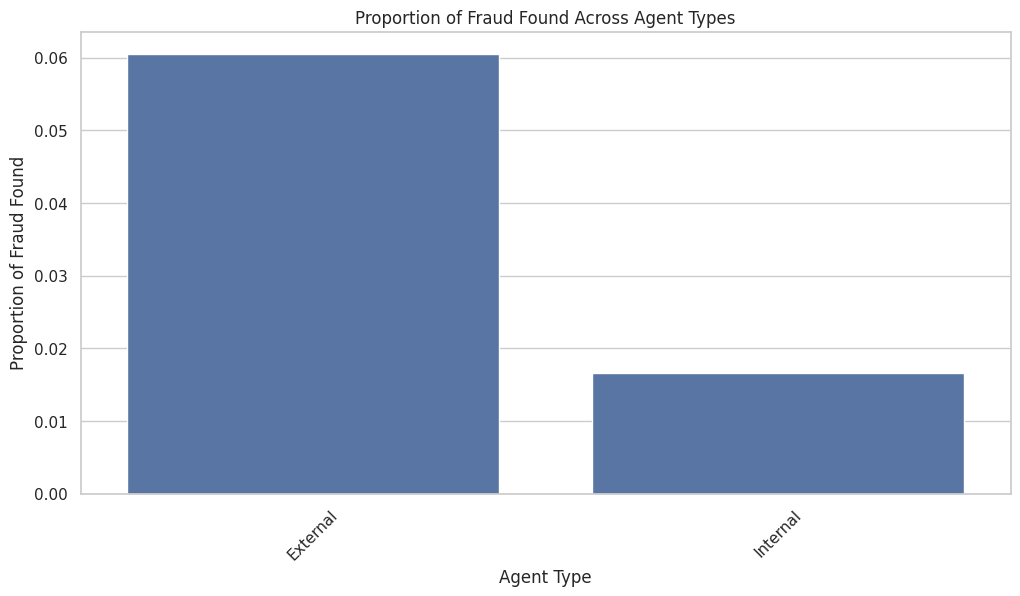

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(x='AgentType', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Agent Types")
plt.xlabel("Agent Type")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

Exclude in model

Similar distributions between fraud count and count plot.

### 1.5 Removing Protected Features

In [ ]:
df.drop(['AgeOfPolicyHolder'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Fault',
       'PolicyType', 'VehicleCategory', 'VehiclePrice', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [ ]:
df_objects.drop(['AgeOfPolicyHolder'], axis=1, inplace=True)

In [ ]:
df_objects.columns

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'BasePolicy'],
      dtype='object')

### 1.6 Integer Datatype

In [ ]:
# Looking at object types to understand.
df_integers = df.select_dtypes(include=['int64'])
df_integers.head()

,WeekOfMonth,WeekOfMonthClaimed,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
0,5,1,0,1,12,300,1,1994
1,3,4,0,2,15,400,4,1994
2,5,2,0,3,7,400,3,1994
3,2,1,0,4,4,400,2,1994
4,5,2,0,5,3,400,1,1994


#### 1.61 Remove Target Variable

In [ ]:
df_integers.drop(['FraudFound_P'], axis=1, inplace=True)

In [ ]:
df_integers.columns

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Year'],
      dtype='object')

#### 1.62 WeekOfMonth

In [ ]:
df_integers['WeekOfMonth'].unique()

array([5, 3, 2, 4, 1])

In [ ]:
df_integers['WeekOfMonth'].value_counts()

,count
WeekOfMonth,
3,3640
2,3558
4,3398
1,3187
5,1637


Distribution

Text(0, 0.5, 'Count')

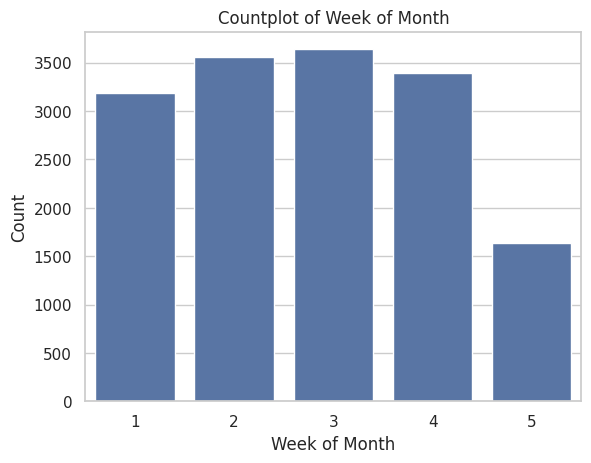

In [ ]:
snsplot = sns.countplot(x='WeekOfMonth', data=df_integers)
snsplot.set_title("Countplot of Week of Month")
snsplot.set_xlabel("Week of Month")
snsplot.set_ylabel("Count")

Distribution Against Fraud

<ipython-input-305-4322e82ab30c>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='WeekOfMonth', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))


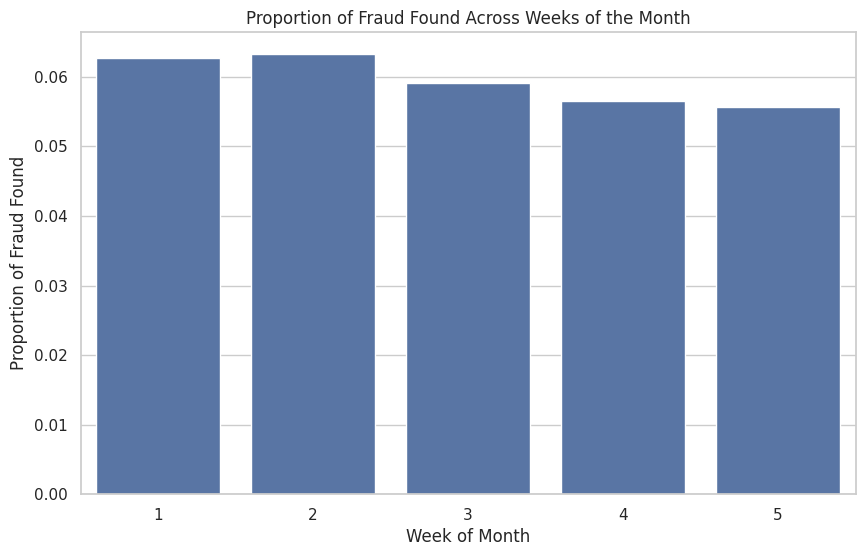

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='WeekOfMonth', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Weeks of the Month")
plt.xlabel("Week of Month")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=0)  # Keep labels horizontal for readability
plt.show()

Exclude from model

Even distribution, doesnt hold value.

#### 1.63 WeekOfMonthClaimed

In [ ]:
df_integers['WeekOfMonthClaimed'].unique()

array([1, 4, 2, 3, 5])

In [ ]:
df_integers['WeekOfMonthClaimed'].value_counts()

,count
WeekOfMonthClaimed,
2,3720
3,3583
1,3450
4,3433
5,1234


Distribution Against

Text(0, 0.5, 'Count')

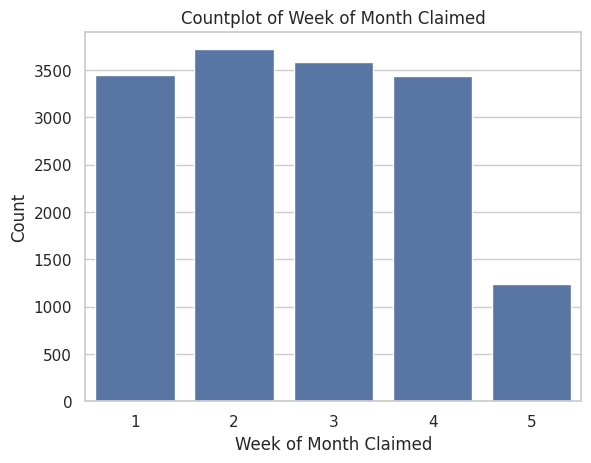

In [ ]:
snsplot = sns.countplot(x='WeekOfMonthClaimed', data=df_integers)
snsplot.set_title("Countplot of Week of Month Claimed")
snsplot.set_xlabel("Week of Month Claimed")
snsplot.set_ylabel("Count")

Distribution Against Fraud

<ipython-input-309-106a011353ac>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='WeekOfMonthClaimed', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))


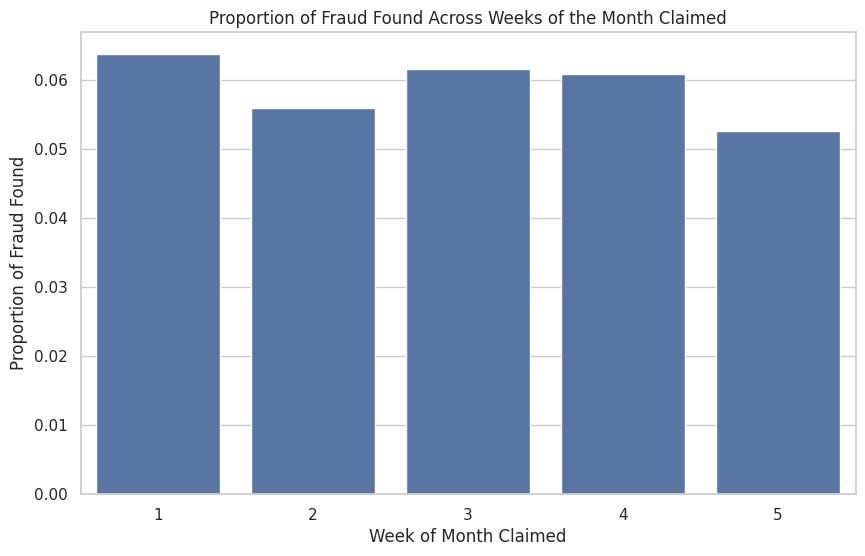

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='WeekOfMonthClaimed', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Weeks of the Month Claimed")
plt.xlabel("Week of Month Claimed")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=0)  # Keep labels horizontal for readability
plt.show()

Exclude from model

Even distributed doesn't hold value.

#### 1.64 PolicyNumber

In [ ]:
df_integers['PolicyNumber'].unique()

array([    1,     2,     3, ..., 15418, 15419, 15420])

In [ ]:
df_integers['PolicyNumber'].value_counts()

,count
PolicyNumber,
1,1
10361,1
10273,1
10274,1
10275,1
...,...
5145,1
5146,1
5147,1


In [ ]:
# snsplot = sns.countplot(x='PolicyNumber', data=df_integers)
# snsplot.set_title("Countplot of Policy Number")
# snsplot.set_xlabel("Policy Number")
# snsplot.set_ylabel("Count")

EXCLUDE this as its a unique identifier and does not contribute to any models.

#### 1.65 RepNumber

In [ ]:
df_integers['RepNumber'].unique()

array([12, 15,  7,  4,  3, 14,  1, 13, 11, 16,  6,  2,  8,  5,  9, 10])

In [ ]:
df_integers['RepNumber'].value_counts()

,count
RepNumber,
7,1069
9,999
1,987
5,987
10,986
12,977
15,977
16,967
2,956


Distribution

Text(0, 0.5, 'Count')

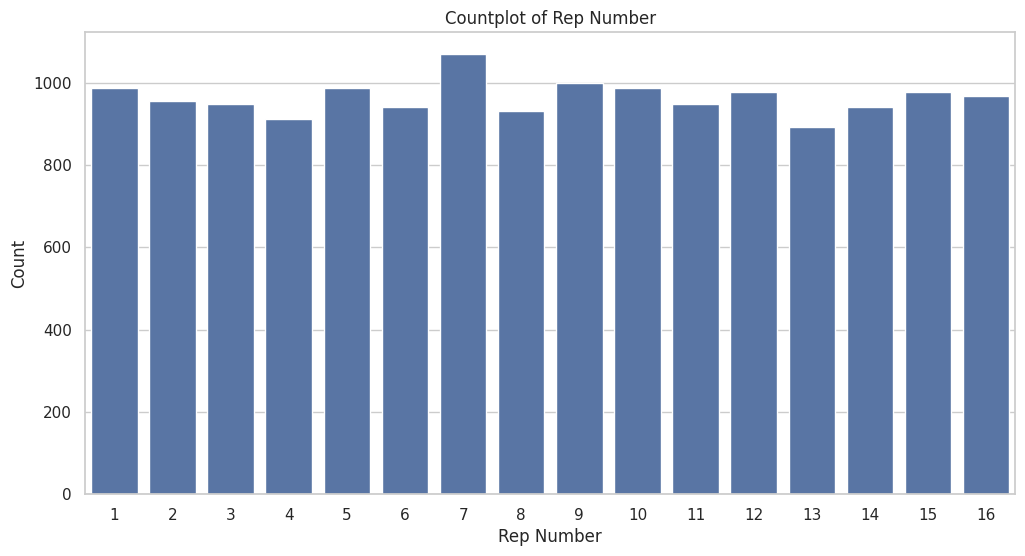

In [ ]:
plt.figure(figsize=(12, 6))

snsplot = sns.countplot(x='RepNumber', data=df_integers)
snsplot.set_title("Countplot of Rep Number")
snsplot.set_xlabel("Rep Number")
snsplot.set_ylabel("Count")

Distribution Against Fraud

<ipython-input-316-d6a12e82607f>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RepNumber', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))


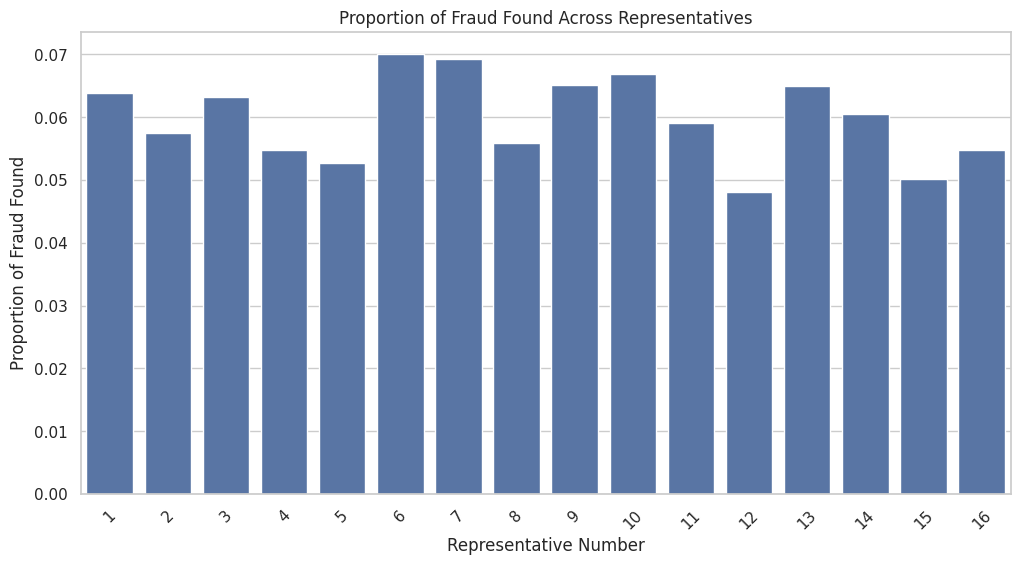

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='RepNumber', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Representatives")
plt.xlabel("Representative Number")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

Exclude from model

Doesn't seem like any reperesentative is purposely detecting fraud cases better than the other.

#### 1.66 Deductible

In [ ]:
df_integers['Deductible'].unique()

array([300, 400, 500, 700])

In [ ]:
df_integers['Deductible'].value_counts()

,count
Deductible,
400,14838
700,311
500,263
300,8


Distribution

Text(0, 0.5, 'Count')

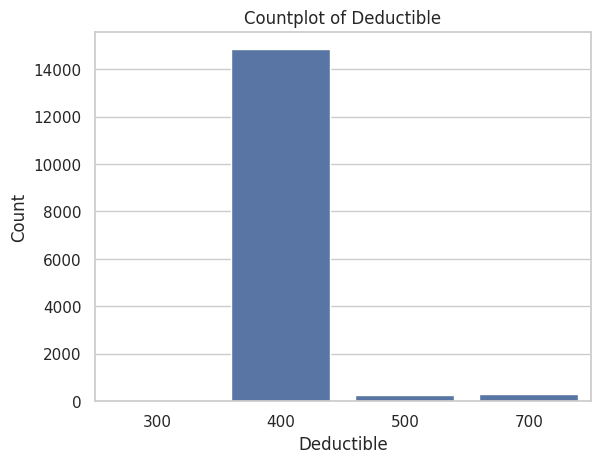

In [ ]:
snsplot = sns.countplot(x='Deductible', data=df_integers)
snsplot.set_title("Countplot of Deductible")
snsplot.set_xlabel("Deductible")
snsplot.set_ylabel("Count")

Distribution Against Fraud

<ipython-input-320-cf06a0f6ecd7>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Deductible', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))


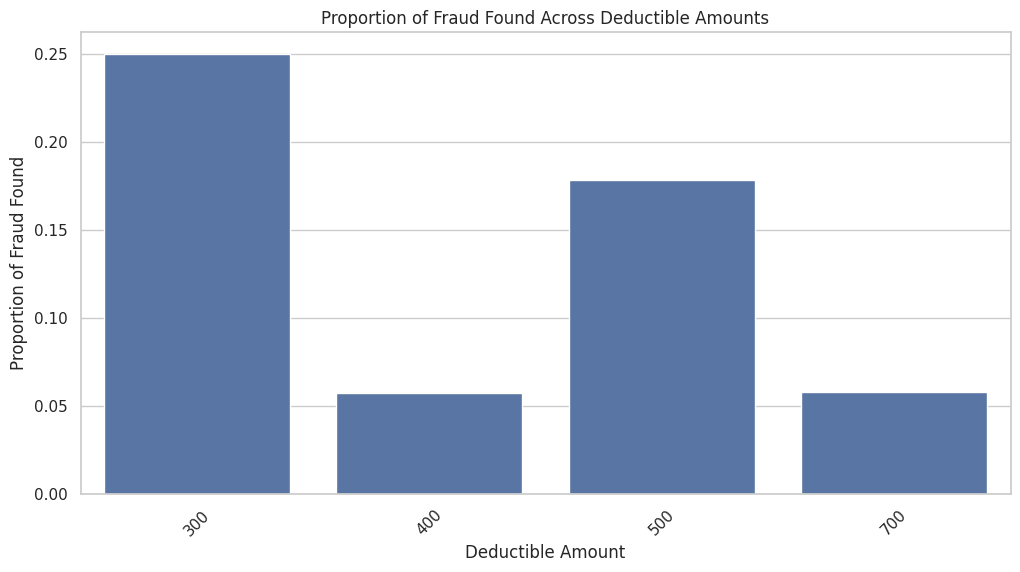

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='Deductible', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Deductible Amounts")
plt.xlabel("Deductible Amount")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

Include in model

Policy holders with lower deductible seems potential to cause fraud in a claim.

#### 1.67 DriverRating

In [ ]:
df_integers['DriverRating'].unique()

array([1, 4, 3, 2])

In [ ]:
df_integers['DriverRating'].value_counts()

,count
DriverRating,
1,3944
3,3884
2,3801
4,3791


Distribution

Text(0, 0.5, 'Count')

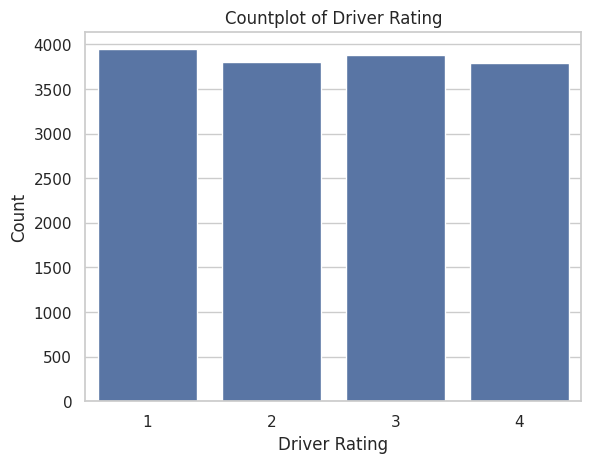

In [ ]:
snsplot = sns.countplot(x='DriverRating', data=df_integers)
snsplot.set_title("Countplot of Driver Rating")
snsplot.set_xlabel("Driver Rating")
snsplot.set_ylabel("Count")

Distribution Against Fraud

<ipython-input-324-eee60ca3c4c3>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='DriverRating', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))


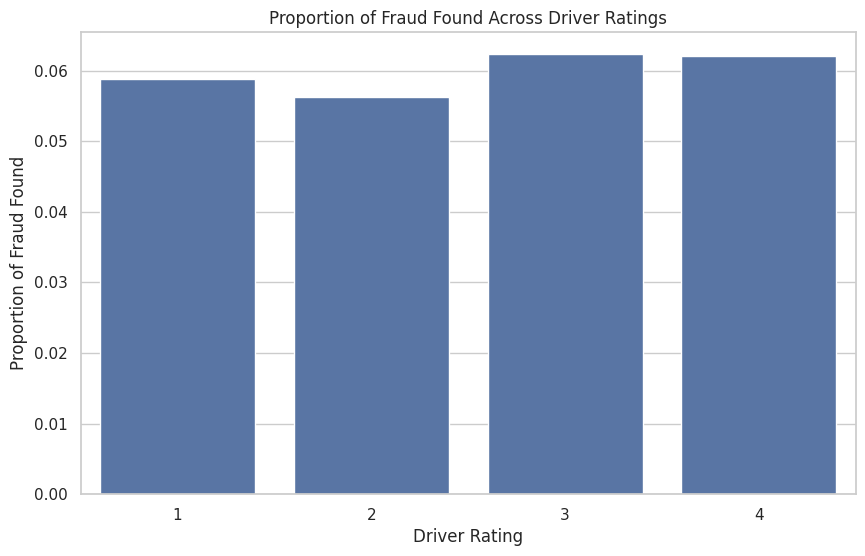

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='DriverRating', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Driver Ratings")
plt.xlabel("Driver Rating")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=0)  # Keep labels horizontal for readability
plt.show()

Exclude from model

Evenly distributed, doesn't hold value.

#### 1.68 Year

In [ ]:
df_integers['Year'].unique()

array([1994, 1995, 1996])

In [ ]:
df_integers['Year'].value_counts()

,count
Year,
1994,6142
1995,5195
1996,4083


Distribution

Text(0, 0.5, 'Count')

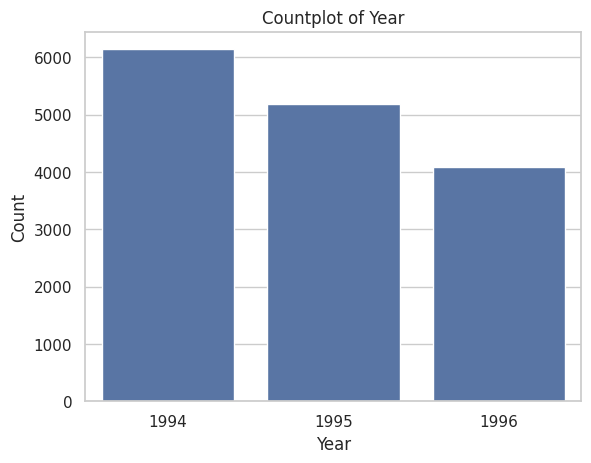

In [ ]:
snsplot = sns.countplot(x='Year', data=df_integers)
snsplot.set_title("Countplot of Year")
snsplot.set_xlabel("Year")
snsplot.set_ylabel("Count")

Distribution Against Fraud

<ipython-input-328-6d9eb1331ed8>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))


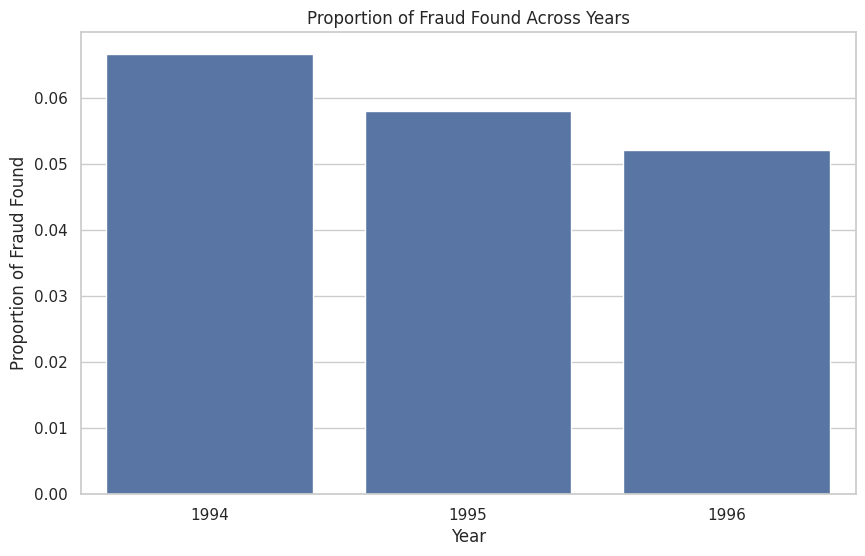

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='Year', y='FraudFound_P', data=df, ci=None, estimator=lambda x: sum(x) / len(x))
plt.title("Proportion of Fraud Found Across Years")
plt.xlabel("Year")
plt.ylabel("Proportion of Fraud Found")
plt.xticks(rotation=0)  # Keep labels horizontal for readability
plt.show()

Exclude from model

Similar distribution, doesn't hold value

#### 1.69 Remove PolicyNumber from Dataframes

In [ ]:
df.drop(['PolicyNumber'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Fault',
       'PolicyType', 'VehicleCategory', 'VehiclePrice', 'FraudFound_P',
       'RepNumber', 'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [ ]:
df_integers.drop(['PolicyNumber'], axis=1, inplace=True)

In [ ]:
df_integers.columns

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'RepNumber', 'Deductible',
       'DriverRating', 'Year'],
      dtype='object')

## 2.0 Data Preprocessing

#### 2.1 Remove Variables

Exluding variables that does not impact fraud based on previous charts and analysis.

In [ ]:
columns_to_drop = [
    'Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',
    'NumberOfSuppliments', 'NumberOfCars', 'AgentType',
    'WeekOfMonth', 'WeekOfMonthClaimed', 'RepNumber',
    'DriverRating', 'Year'
]

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

In [ ]:
df.head()

,Make,AccidentArea,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AddressChange_Claim,BasePolicy
0,Honda,Urban,Policy Holder,Sport - Liability,Sport,more than 69000,0,300,more than 30,more than 30,none,3 years,No,No,1 year,Liability
1,Honda,Urban,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,more than 30,more than 30,none,6 years,Yes,No,no change,Collision
2,Honda,Urban,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,more than 30,more than 30,1,7 years,No,No,no change,Collision
3,Toyota,Rural,Third Party,Sedan - Liability,Sport,20000 to 29000,0,400,more than 30,more than 30,1,more than 7,Yes,No,no change,Liability
4,Honda,Urban,Third Party,Sport - Collision,Sport,more than 69000,0,400,more than 30,more than 30,none,5 years,No,No,no change,Collision


In [ ]:
df.columns

Index(['Make', 'AccidentArea', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'Deductible', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'PoliceReportFiled', 'WitnessPresent', 'AddressChange_Claim',
       'BasePolicy'],
      dtype='object')

In [ ]:
df.shape

(15420, 16)

#### 2.2 Hot Encode Variables

In [ ]:
binary_columns = [col for col in df.columns if df[col].dropna().isin(['Yes', 'No']).all()]

df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0}).astype(int)

remaining_categorical = df.select_dtypes(include=['object']).columns.difference(binary_columns)

df_encoded = pd.get_dummies(df, columns=remaining_categorical, drop_first=True)

df_encoded = df_encoded.astype(int)

df_encoded = pd.get_dummies(df_encoded, columns=['Deductible'], prefix='Deductible', drop_first=False)

df_encoded = df_encoded.astype(int)

print(df_encoded.head())

   FraudFound_P  PoliceReportFiled  WitnessPresent  AccidentArea_Urban  \
0             0                  0               0                   1   
1             0                  1               0                   1   
2             0                  0               0                   1   
3             0                  1               0                   0   
4             0                  0               0                   1   

   AddressChange_Claim_2 to 3 years  AddressChange_Claim_4 to 8 years  \
0                                 0                                 0   
1                                 0                                 0   
2                                 0                                 0   
3                                 0                                 0   
4                                 0                                 0   

   AddressChange_Claim_no change  AddressChange_Claim_under 6 months  \
0                              0            

<ipython-input-337-8d39fb3c4b02>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0}).astype(int)


In [ ]:
non_binary_values = df_encoded[(df_encoded != 0) & (df_encoded != 1)].stack()

# Display rows and columns with non-binary values, if any
if not non_binary_values.empty:
    print("Columns with non-binary values:")
    print(non_binary_values)
else:
    print("All values in the DataFrame are binary (0 or 1).")

All values in the DataFrame are binary (0 or 1).


In [ ]:
target = df_encoded['FraudFound_P']

#### 2.3 Train Test Split

In [ ]:
# Partition the data
predictors = df_encoded.drop(['FraudFound_P'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.4, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)


(9252, 64) (6168, 64) (9252,) (6168,)


#### 2.4 Data Balancing

In [ ]:
# Combine predictors_train and target_train into a single DataFrame
combined_train_df = pd.concat([predictors_train, target_train], axis=1)

# Separate majority and minority classes
majority_train_df = combined_train_df[combined_train_df['FraudFound_P'] == 0]
minority_train_df = combined_train_df[combined_train_df['FraudFound_P'] == 1]

# Undersample the majority class randomly
undersampled_majority_train = majority_train_df.sample(n=len(minority_train_df), random_state=62)

# Combine the undersampled majority class and the minority class
balanced_train_data = pd.concat([undersampled_majority_train, minority_train_df])

# Shuffle the combined DataFrame to ensure randomness
balanced_train_data = balanced_train_data.sample(frac=1, random_state=62)

# Split the balanced training data
predictors_train_balanced = balanced_train_data.drop(columns=['FraudFound_P'])
target_train_balanced = balanced_train_data['FraudFound_P']

# Step 2: Balance the Test Data
# Combine predictors_test and target_test into a single DataFrame
combined_test_df = pd.concat([predictors_test, target_test], axis=1)

# Separate majority and minority classes
majority_test_df = combined_test_df[combined_test_df['FraudFound_P'] == 0]
minority_test_df = combined_test_df[combined_test_df['FraudFound_P'] == 1]

# Undersample the majority class randomly
undersampled_majority_test = majority_test_df.sample(n=len(minority_test_df), random_state=62)

# Combine the undersampled majority class and the minority class
balanced_test_data = pd.concat([undersampled_majority_test, minority_test_df])

# Shuffle the combined DataFrame to ensure randomness
balanced_test_data = balanced_test_data.sample(frac=1, random_state=62)

# Split the balanced test data
predictors_test_balanced = balanced_test_data.drop(columns=['FraudFound_P'])
target_test_balanced = balanced_test_data['FraudFound_P']

# Display class distribution for verification
print("Balanced Training Data Class Distribution:")
print(target_train_balanced.value_counts())

print("\nBalanced Test Data Class Distribution:")
print(target_test_balanced.value_counts())


Balanced Training Data Class Distribution:
FraudFound_P
0    562
1    562
Name: count, dtype: int64

Balanced Test Data Class Distribution:
FraudFound_P
0    361
1    361
Name: count, dtype: int64


## 3.0 Model Development

#### 3.1 Decision Tree Model

In [ ]:
# Step 1: Train the Decision Tree on the balanced training data
dt_model = DecisionTreeClassifier(random_state=42, max_depth=None, class_weight=None)
dt_model.fit(predictors_train_balanced, target_train_balanced)

# Step 2: Evaluate on the original test data
# Ensure test predictors are consistent with the balanced training predictors
predictors_test = predictors_test.reindex(columns=predictors_train_balanced.columns)

y_pred_test = dt_model.predict(predictors_test)
print("Metrics on Original Test Data")
accuracy_original = accuracy_score(target_test, y_pred_test)
print(f"Accuracy: {accuracy_original}")

conf_matrix_original = confusion_matrix(target_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix_original)

class_report_original = classification_report(target_test, y_pred_test)
print("Classification Report:")
print(class_report_original)

# Step 3: Evaluate on the balanced test data
# Ensure balanced test predictors are consistent with the balanced training predictors
predictors_test_balanced = predictors_test_balanced.reindex(columns=predictors_train_balanced.columns)

y_pred_balanced_test = dt_model.predict(predictors_test_balanced)
print("\nMetrics on Balanced Test Data")
accuracy_balanced = accuracy_score(target_test_balanced, y_pred_balanced_test)
print(f"Accuracy on Balanced Test Data: {accuracy_balanced}")

conf_matrix_balanced = confusion_matrix(target_test_balanced, y_pred_balanced_test)
print("Confusion Matrix on Balanced Test Data:")
print(conf_matrix_balanced)

class_report_balanced = classification_report(target_test_balanced, y_pred_balanced_test)
print("Classification Report on Balanced Test Data:")
print(class_report_balanced)

Metrics on Original Test Data
Accuracy: 0.7214656290531777
Confusion Matrix:
[[4206 1601]
 [ 117  244]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83      5807
           1       0.13      0.68      0.22       361

    accuracy                           0.72      6168
   macro avg       0.55      0.70      0.53      6168
weighted avg       0.92      0.72      0.79      6168


Metrics on Balanced Test Data
Accuracy on Balanced Test Data: 0.7091412742382271
Confusion Matrix on Balanced Test Data:
[[268  93]
 [117 244]]
Classification Report on Balanced Test Data:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       361
           1       0.72      0.68      0.70       361

    accuracy                           0.71       722
   macro avg       0.71      0.71      0.71       722
weighted avg       0.71      0.71      0.71       722



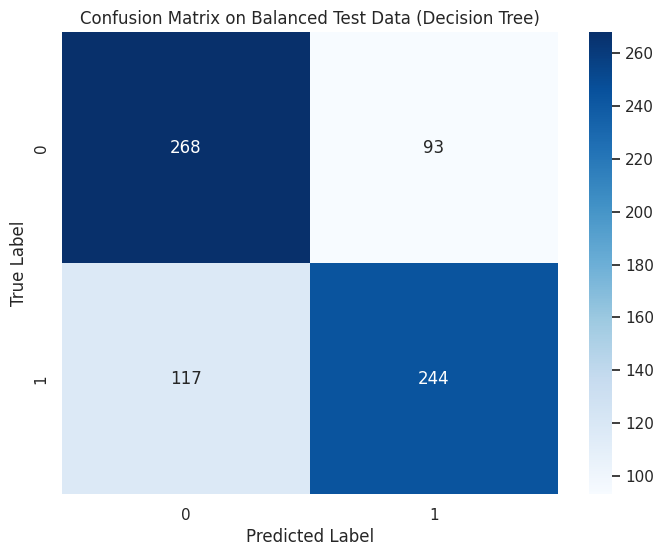

In [ ]:
# Step 6: Visualize Confusion Matrix for Balanced Test Data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_balanced, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on Balanced Test Data (Decision Tree)")
plt.show()

#### 3.2 Logistics Regression

In [ ]:
# Step 1: Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Step 2: Train the model using the balanced training data
log_reg.fit(predictors_train_balanced, target_train_balanced)

# Step 3: Evaluate on the balanced test data
y_pred_balanced_test = log_reg.predict(predictors_test_balanced)

# Metrics for balanced test data
print("Metrics on Balanced Test Data:")
accuracy_balanced = accuracy_score(target_test_balanced, y_pred_balanced_test)
print(f"Accuracy on Balanced Test Data: {accuracy_balanced}")

conf_matrix_balanced = confusion_matrix(target_test_balanced, y_pred_balanced_test)
print("Confusion Matrix on Balanced Test Data:")
print(conf_matrix_balanced)

class_report_balanced = classification_report(target_test_balanced, y_pred_balanced_test)
print("Classification Report on Balanced Test Data:")
print(class_report_balanced)

Metrics on Balanced Test Data:
Accuracy on Balanced Test Data: 0.7631578947368421
Confusion Matrix on Balanced Test Data:
[[214 147]
 [ 24 337]]
Classification Report on Balanced Test Data:
              precision    recall  f1-score   support

           0       0.90      0.59      0.71       361
           1       0.70      0.93      0.80       361

    accuracy                           0.76       722
   macro avg       0.80      0.76      0.76       722
weighted avg       0.80      0.76      0.76       722



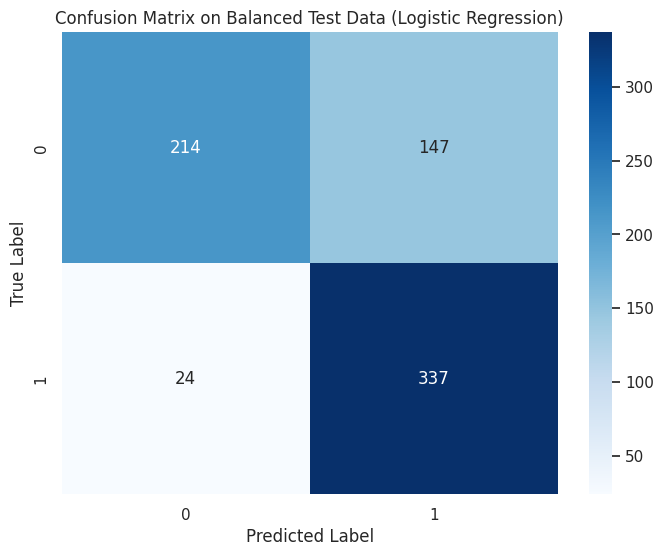

In [ ]:
# Step 5: Visualize the confusion matrix for the balanced test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_balanced, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on Balanced Test Data (Logistic Regression)")
plt.show()

#### 3.3 Random Forest

In [ ]:
# Step 1: Initialize the Random Forest model
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=100,  # Number of trees
    max_depth=None,    # Let the trees grow fully
    class_weight=None  # Not needed since the training data is already balanced
)

# Step 2: Train the model using the balanced training data
rf_model.fit(predictors_train_balanced, target_train_balanced)

# Step 3: Evaluate on the balanced test data
y_pred_balanced_test = rf_model.predict(predictors_test_balanced)

# Metrics for balanced test data
print("Metrics on Balanced Test Data:")
accuracy_balanced = accuracy_score(target_test_balanced, y_pred_balanced_test)
print(f"Accuracy on Balanced Test Data: {accuracy_balanced}")

conf_matrix_balanced = confusion_matrix(target_test_balanced, y_pred_balanced_test)
print("Confusion Matrix on Balanced Test Data:")
print(conf_matrix_balanced)

class_report_balanced = classification_report(target_test_balanced, y_pred_balanced_test)
print("Classification Report on Balanced Test Data:")
print(class_report_balanced)

Metrics on Balanced Test Data:
Accuracy on Balanced Test Data: 0.7326869806094183
Confusion Matrix on Balanced Test Data:
[[255 106]
 [ 87 274]]
Classification Report on Balanced Test Data:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       361
           1       0.72      0.76      0.74       361

    accuracy                           0.73       722
   macro avg       0.73      0.73      0.73       722
weighted avg       0.73      0.73      0.73       722



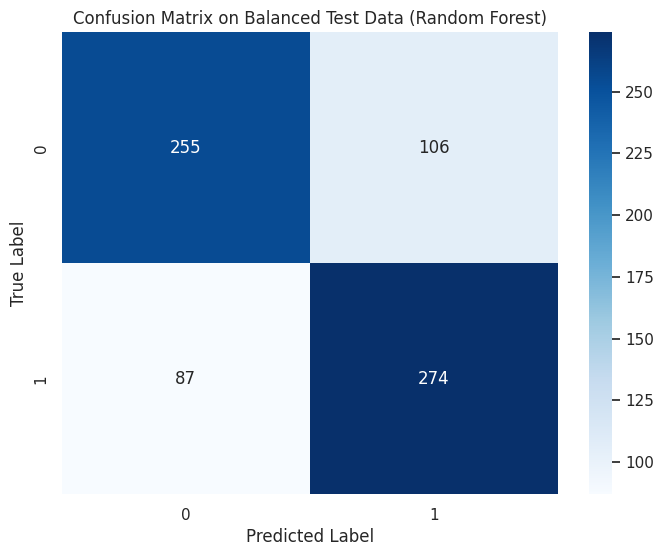

In [ ]:
# Step 4: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_balanced, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on Balanced Test Data (Random Forest)")
plt.show()

#### 3.4 CNN

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 - 2s - 57ms/step - accuracy: 0.6610 - loss: 0.6081 - val_accuracy: 0.7507 - val_loss: 0.5438
Epoch 2/50
36/36 - 0s - 11ms/step - accuracy: 0.7482 - loss: 0.5210 - val_accuracy: 0.7341 - val_loss: 0.5257
Epoch 3/50
36/36 - 0s - 9ms/step - accuracy: 0.7438 - loss: 0.5025 - val_accuracy: 0.7479 - val_loss: 0.5127
Epoch 4/50
36/36 - 0s - 7ms/step - accuracy: 0.7607 - loss: 0.4909 - val_accuracy: 0.7590 - val_loss: 0.5091
Epoch 5/50
36/36 - 0s - 9ms/step - accuracy: 0.7642 - loss: 0.4822 - val_accuracy: 0.7382 - val_loss: 0.5166
Epoch 6/50
36/36 - 0s - 9ms/step - accuracy: 0.7687 - loss: 0.4716 - val_accuracy: 0.7507 - val_loss: 0.5126
Epoch 7/50
36/36 - 0s - 8ms/step - accuracy: 0.7553 - loss: 0.4781 - val_accuracy: 0.7507 - val_loss: 0.5049
Epoch 8/50
36/36 - 0s - 8ms/step - accuracy: 0.7669 - loss: 0.4646 - val_accuracy: 0.7604 - val_loss: 0.5077
Epoch 9/50
36/36 - 0s - 7ms/step - accuracy: 0.7642 - loss: 0.4746 - val_accuracy: 0.7590 - val_loss: 0.5021
Epoch 10/50
36/36 - 0s - 8ms

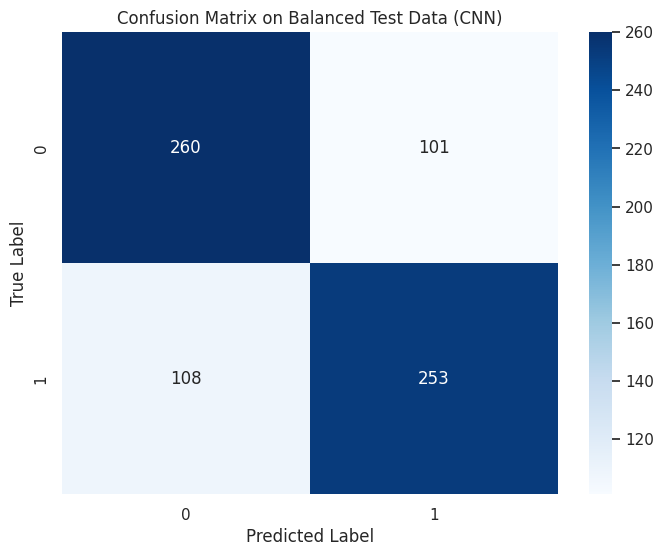

In [ ]:
# Convert predictors to NumPy arrays
X_train = predictors_train_balanced.to_numpy()
X_test = predictors_test_balanced.to_numpy()

# Reshape the data to add a "channel" dimension (required for CNNs)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Convert targets to NumPy arrays
y_train = target_train_balanced.to_numpy()
y_test = target_test_balanced.to_numpy()

# Step 2: Build the CNN model
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),  # Add dropout for regularization
    Flatten(),  # Flatten to feed into Dense layers
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train the CNN model
history = cnn_model.fit(
    X_train, y_train,
    epochs=50,  # Adjust based on performance
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=2
)

# Step 4: Evaluate the CNN on the balanced test data
y_pred_prob = cnn_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print("Metrics on Balanced Test Data:")
accuracy_balanced = accuracy_score(y_test, y_pred)
print(f"Accuracy on Balanced Test Data: {accuracy_balanced}")

conf_matrix_balanced = confusion_matrix(y_test, y_pred)
print("Confusion Matrix on Balanced Test Data:")
print(conf_matrix_balanced)

class_report_balanced = classification_report(y_test, y_pred)
print("Classification Report on Balanced Test Data:")
print(class_report_balanced)

# Step 5: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_balanced, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on Balanced Test Data (CNN)")
plt.show()

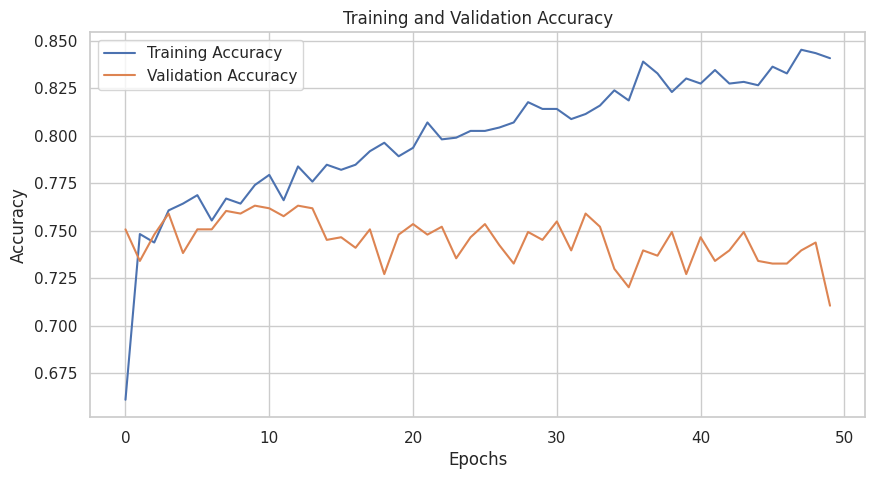

In [ ]:
# Step 6: Plot training and validation performance
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

## 4.0 Results and Comparisons

### 4.1 5-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Convert balanced training data to NumPy arrays
X = predictors_train_balanced.to_numpy()
y = target_train_balanced.to_numpy()

# Reshape for CNN (add "channel" dimension)
X_cnn = X.reshape(X.shape[0], X.shape[1], 1)


In [ ]:
def train_decision_tree(X_train, y_train, X_val, y_val):
    dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_val)  # Fixed variable name
    return y_pred

In [ ]:
def train_logistic_regression(X_train, y_train, X_val, y_val):
    log_reg = LogisticRegression(random_state=42, max_iter=1000)
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_val)
    return y_pred

In [ ]:
def train_random_forest(X_train, y_train, X_val, y_val):
    rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_val)
    return y_pred

In [ ]:
def train_cnn(X_train, y_train, X_val, y_val):
    # Define the CNN model
    cnn_model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the CNN model
    cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the CNN model
    cnn_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

    # Evaluate the CNN model
    y_pred_prob = cnn_model.predict(X_val)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()
    return y_pred

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics for each model
models = {
    "Decision Tree": train_decision_tree,
    "Logistic Regression": train_logistic_regression,
    "Random Forest": train_random_forest,
    "CNN": train_cnn
}

metrics = {model: {"accuracy": [], "precision": [], "recall": [], "f1": []} for model in models.keys()}

# Perform 5-Fold Cross-Validation
for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}")

    # Split data into training and validation for this fold
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Reshape for CNN
    X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_val_cnn = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

    for model_name, train_model in models.items():
        print(f"Training {model_name}...")

        # Train and predict
        if model_name == "CNN":
            y_pred = train_model(X_train_cnn, y_train, X_val_cnn, y_val)
        else:
            y_pred = train_model(X_train, y_train, X_val, y_val)

        # Calculate metrics
        metrics[model_name]["accuracy"].append(accuracy_score(y_val, y_pred))
        metrics[model_name]["precision"].append(precision_score(y_val, y_pred))
        metrics[model_name]["recall"].append(recall_score(y_val, y_pred))
        metrics[model_name]["f1"].append(f1_score(y_val, y_pred))

# Print average metrics for each model
for model_name, model_metrics in metrics.items():
    print(f"\n{model_name} Average Metrics:")
    print(f"Accuracy: {np.mean(model_metrics['accuracy']):.4f}")
    print(f"Precision: {np.mean(model_metrics['precision']):.4f}")
    print(f"Recall: {np.mean(model_metrics['recall']):.4f}")
    print(f"F1-Score: {np.mean(model_metrics['f1']):.4f}")


Fold 1
Training Decision Tree...
Training Logistic Regression...
Training Random Forest...
Training CNN...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Fold 2
Training Decision Tree...
Training Logistic Regression...
Training Random Forest...
Training CNN...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Fold 3
Training Decision Tree...
Training Logistic Regression...
Training Random Forest...
Training CNN...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Fold 4
Training Decision Tree...
Training Logistic Regression...
Training Random Forest...
Training CNN...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Fold 5
Training Decision Tree...
Training Logistic Regression...
Training Random Forest...
Training CNN...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Decision Tree Average Metrics:
Accuracy: 0.7099
Precision: 0.6812
Recall: 0.7782
F1-Score: 0.7261

Logistic Regression Average Metrics:
Accuracy: 0.7482
Precision: 0.6980
Recall: 0.8791
F1-Score: 0.7760

Random Forest Average Metrics:
Accuracy: 0.7544
Precision: 0.6928
Recall: 0.9107
F1-Score: 0.7861

CNN Average Metrics:
Accuracy: 0.7544
Precision: 0.6994
Recall: 0.8773
F1-Score: 0.7775


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics and classification reports for each model
models = {
    "Decision Tree": train_decision_tree,
    "Logistic Regression": train_logistic_regression,
    "Random Forest": train_random_forest,
    "CNN": train_cnn
}

metrics = {model: {"accuracy": [], "precision": [], "recall": [], "f1": [], "classification_reports": []} for model in models.keys()}

# Perform 5-Fold Cross-Validation
for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}")

    # Split data into training and validation for this fold
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Reshape for CNN
    X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_val_cnn = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

    for model_name, train_model in models.items():
        print(f"Training {model_name}...")

        # Train and predict
        if model_name == "CNN":
            y_pred = train_model(X_train_cnn, y_train, X_val_cnn, y_val)
        else:
            y_pred = train_model(X_train, y_train, X_val, y_val)

        # Calculate metrics
        metrics[model_name]["accuracy"].append(accuracy_score(y_val, y_pred))
        metrics[model_name]["precision"].append(precision_score(y_val, y_pred))
        metrics[model_name]["recall"].append(recall_score(y_val, y_pred))
        metrics[model_name]["f1"].append(f1_score(y_val, y_pred))

        # Store classification report
        class_report = classification_report(y_val, y_pred, output_dict=True)
        metrics[model_name]["classification_reports"].append(class_report)

# Print average metrics for each model
for model_name, model_metrics in metrics.items():
    print(f"\n{model_name} Average Metrics:")
    print(f"Accuracy: {np.mean(model_metrics['accuracy']):.4f}")
    print(f"Precision: {np.mean(model_metrics['precision']):.4f}")
    print(f"Recall: {np.mean(model_metrics['recall']):.4f}")
    print(f"F1-Score: {np.mean(model_metrics['f1']):.4f}")

    # Print classification reports for all folds
    print(f"\n{model_name} Classification Reports for Each Fold:")
    for fold_idx, report in enumerate(model_metrics["classification_reports"]):
        print(f"Fold {fold_idx + 1} Classification Report:")
        print(classification_report(y_val, y_pred))  # Display readable report


Fold 1
Training Decision Tree...
Training Logistic Regression...
Training Random Forest...
Training CNN...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Fold 2
Training Decision Tree...
Training Logistic Regression...
Training Random Forest...
Training CNN...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Fold 3
Training Decision Tree...
Training Logistic Regression...
Training Random Forest...
Training CNN...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Fold 4
Training Decision Tree...
Training Logistic Regression...
Training Random Forest...
Training CNN...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Fold 5
Training Decision Tree...
Training Logistic Regression...
Training Random Forest...
Training CNN...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Decision Tree Average Metrics:
Accuracy: 0.7099
Precision: 0.6812
Recall: 0.7782
F1-Score: 0.7261

Decision Tree Classification Reports for Each Fold:
Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.62      0.69       128
           1       0.60      0.76      0.67        96

    accuracy                           0.68       224
   macro avg       0.69      0.69      0.68       224
weighted avg       0.70      0.68      0.68       224

Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.62      0.69       128
           1       0.60      0.76      0.67        96

    accuracy                           0.68       224
   macro avg       0.69      0.69      0.68       224
weighted avg       0.70      0.68      0.68       224

Fold 3 Classification Report:
              precision    recall  f1-score   support

           

### 4.2 Confusion Matrices

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


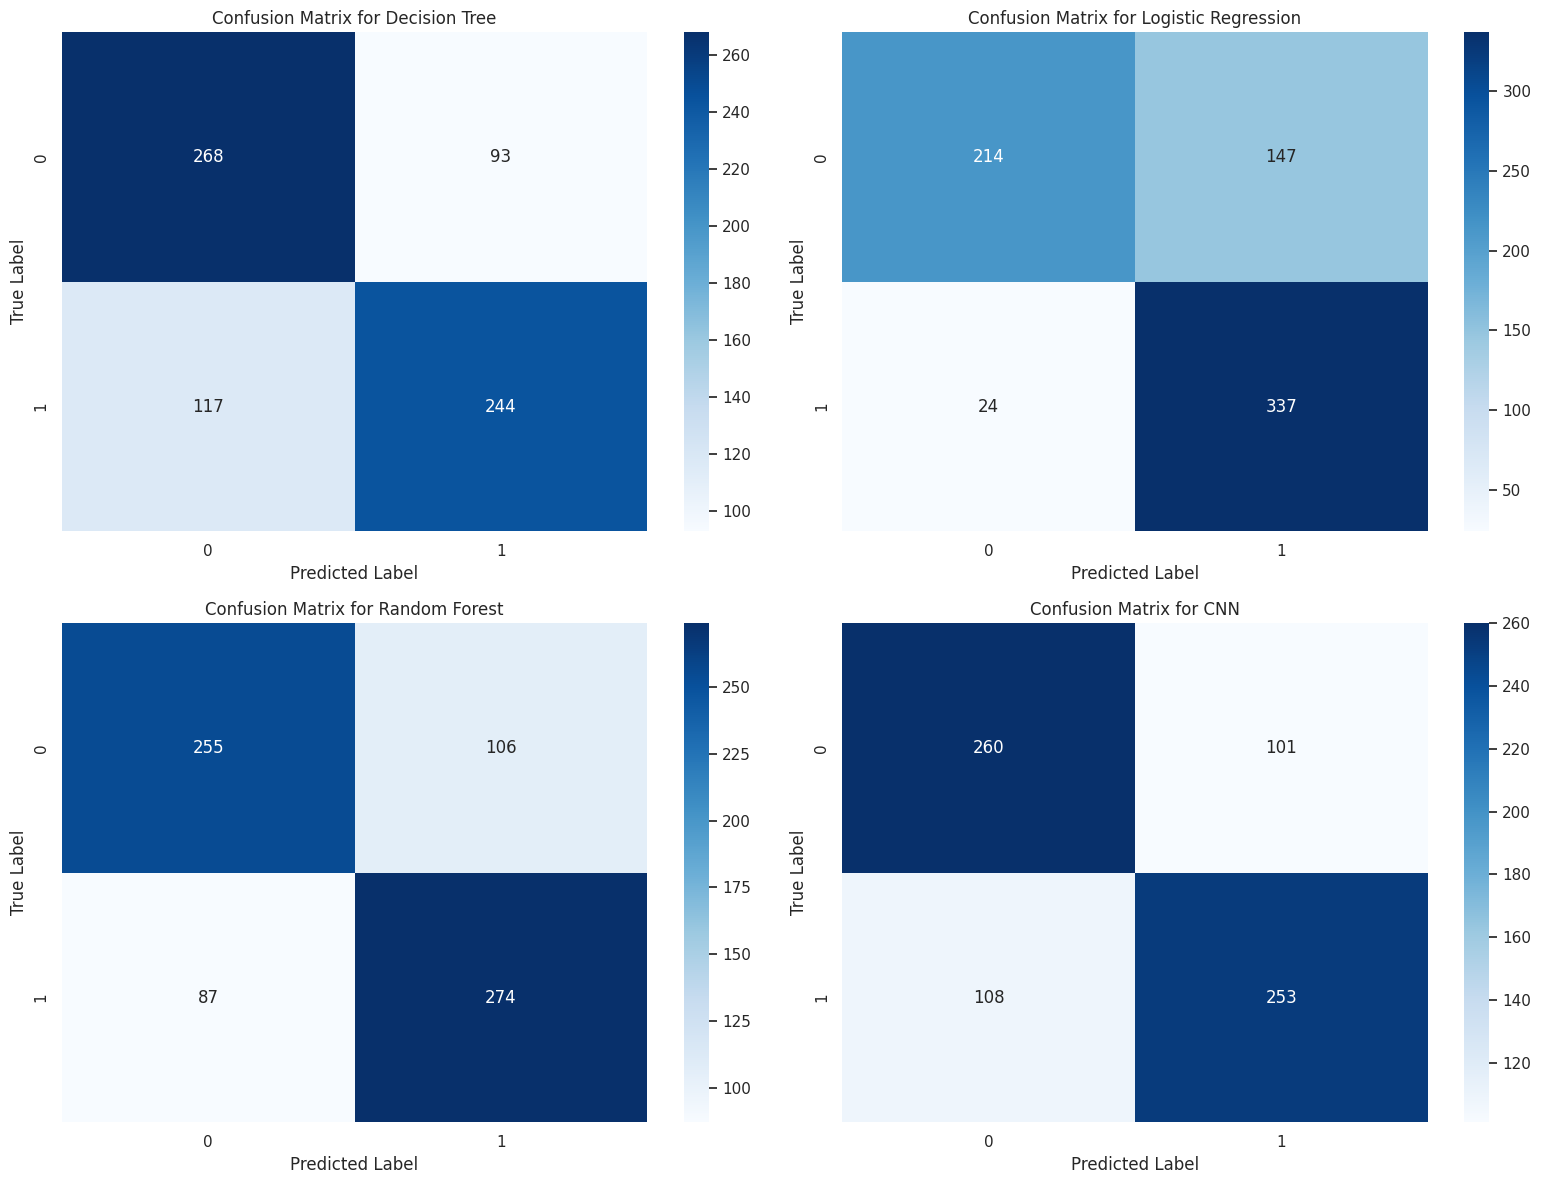

In [ ]:
# Dictionary to store models and predictions
models = {
    "Decision Tree": dt_model,        # Trained Decision Tree model
    "Logistic Regression": log_reg,  # Trained Logistic Regression model
    "Random Forest": rf_model,       # Trained Random Forest model
    "CNN": cnn_model                 # Trained CNN model
}

# Get predictions for each model
predictions = {}

# Predict for non-CNN models
for model_name, model in models.items():
    if model_name != "CNN":
        predictions[model_name] = model.predict(predictors_test_balanced)

# Predict for CNN model
cnn_probabilities = models["CNN"].predict(predictors_test_balanced.values.reshape(-1, predictors_test_balanced.shape[1], 1))
predictions["CNN"] = (cnn_probabilities > 0.5).astype(int).flatten()

# Plot confusion matrices
plt.figure(figsize=(16, 12))

for idx, (model_name, y_pred) in enumerate(predictions.items(), 1):
    # Compute confusion matrix
    conf_matrix = confusion_matrix(target_test_balanced, y_pred)

    # Plot the confusion matrix
    plt.subplot(2, 2, idx)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model_name}")

plt.tight_layout()
plt.show()

### 4.3 ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

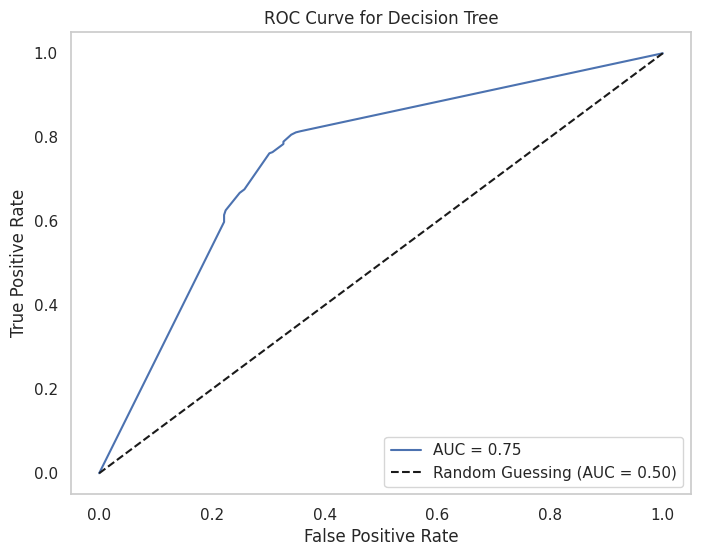

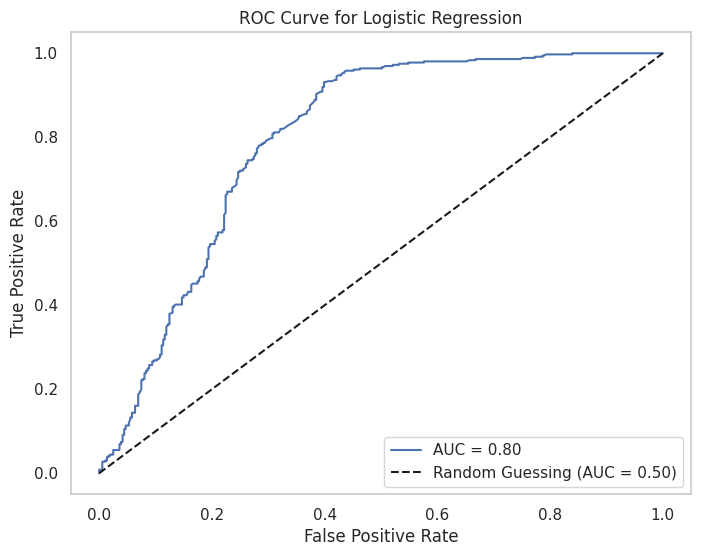

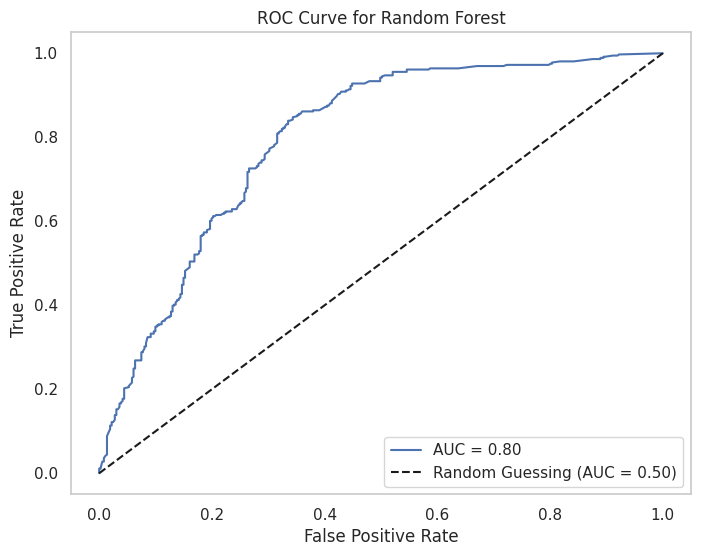

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


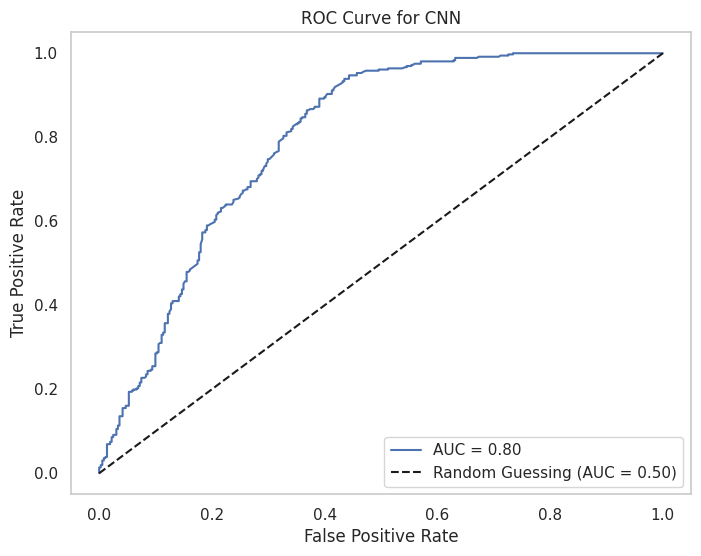

In [ ]:
# Plot ROC Curve for each model
for idx, (model_name, model) in enumerate(models.items()):
    plt.figure(figsize=(8, 6))

    if model_name != "CNN":
        # Get predicted probabilities for non-CNN models
        y_pred_prob = model.predict_proba(predictors_test_balanced)[:, 1]
    else:
        # Get predicted probabilities for CNN
        y_pred_prob = model.predict(predictors_test_balanced.values.reshape(-1, predictors_test_balanced.shape[1], 1)).flatten()

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(target_test_balanced, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing (AUC = 0.50)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {model_name}")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

### 4.4 Highest Impact Variable

#### 4.41 Logistics Regression

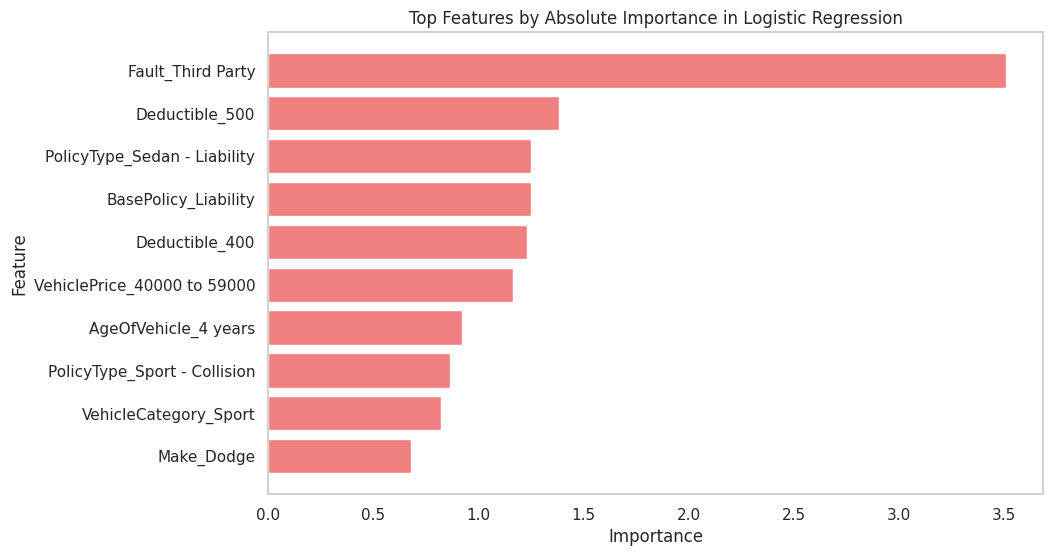

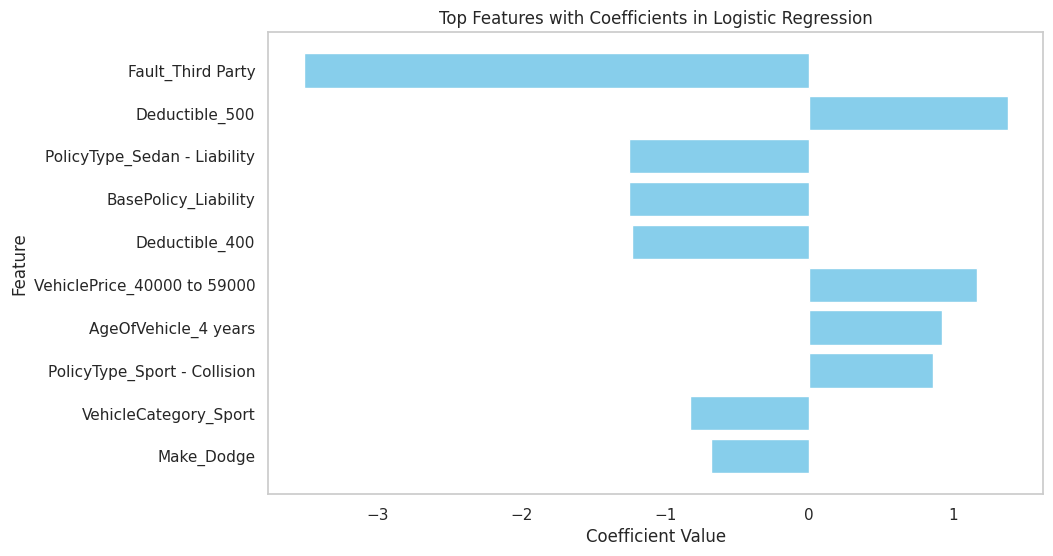

In [ ]:
def plot_logistic_regression_features(model, feature_names, top_n=10):
    # Extract coefficients from the logistic regression model
    coefficients = model.coef_.flatten()

    # Create a DataFrame for better visualization
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    coef_df['AbsCoefficient'] = np.abs(coef_df['Coefficient'])  # Take absolute value for sorting

    # Sort by absolute coefficient value
    top_features = coef_df.sort_values(by='AbsCoefficient', ascending=False).head(top_n)

    # Plot 1: Top Features by Absolute Importance
    plt.figure(figsize=(10, 6))
    plt.barh(top_features['Feature'], top_features['AbsCoefficient'], color='lightcoral')
    plt.gca().invert_yaxis()  # Show the highest importance on top
    plt.title('Top Features by Absolute Importance in Logistic Regression')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid()
    plt.show()

    print(' ')

    # Plot 2: Top Features with Positive/Negative Coefficients
    plt.figure(figsize=(10, 6))
    plt.barh(top_features['Feature'], top_features['Coefficient'], color='skyblue')
    plt.gca().invert_yaxis()  # Show the highest importance on top
    plt.title('Top Features with Coefficients in Logistic Regression')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid()
    plt.show()

# Call the function for Logistic Regression
plot_logistic_regression_features(log_reg, predictors_train_balanced.columns, top_n=10)


#### 4.42 Random Forest

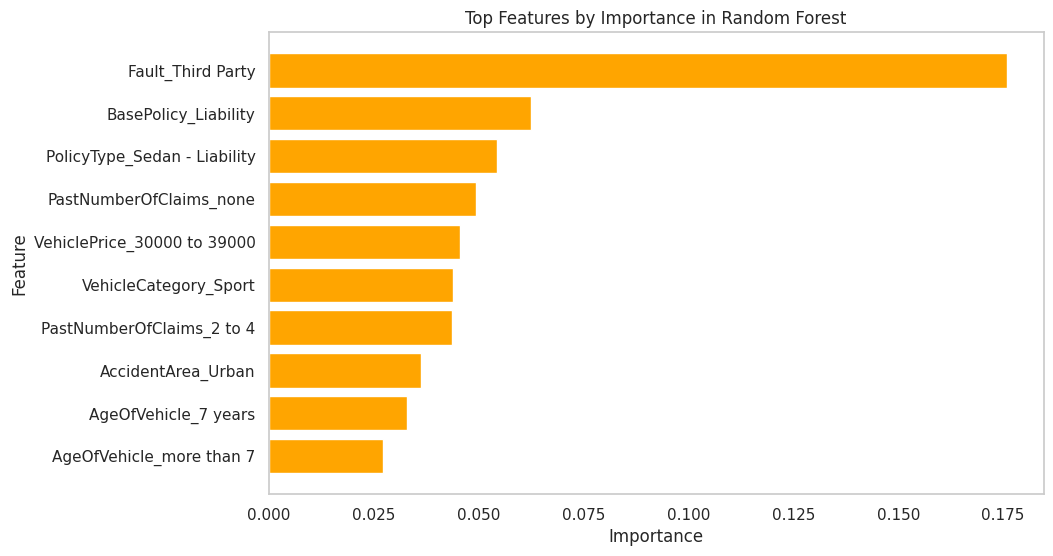

In [ ]:
def plot_random_forest_features(model, feature_names, top_n=10):
    # Extract feature importances from the random forest model
    feature_importances = model.feature_importances_

    # Create a DataFrame for better visualization
    rf_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False).head(top_n)  # Top N features

    # Plot 1: Top Features by Importance
    plt.figure(figsize=(10, 6))
    plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'], color='orange')
    plt.gca().invert_yaxis()  # Show the highest importance on top
    plt.title('Top Features by Importance in Random Forest')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid()
    plt.show()

# Call the function for Random Forest
plot_random_forest_features(rf_model, predictors_train_balanced.columns, top_n=10)
